# FORECASTING BOILER PRESSURE

In [111]:
import pandas as pd
import numpy as np
import warnings
import itertools
import requests
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
boiler = pd.read_csv('TimeS_Boiler.csv')

In [3]:
boiler.head(5)

Date  MAIN_FILTER_IN_PRESSURE
0  01-01-2018                10.338284
1  01-02-2018                 9.580143
2  01-03-2018                 9.377435
3  01-04-2018                 9.697717
4  01-05-2018                10.220714

In [4]:
boiler.tail(5)

Date  MAIN_FILTER_IN_PRESSURE
540  6/25/2019                10.058544
541  6/26/2019                 9.219318
542  6/27/2019                10.180172
543  6/28/2019                 9.458520
544  6/29/2019                 9.900429

<function matplotlib.pyplot.show(close=None, block=None)>

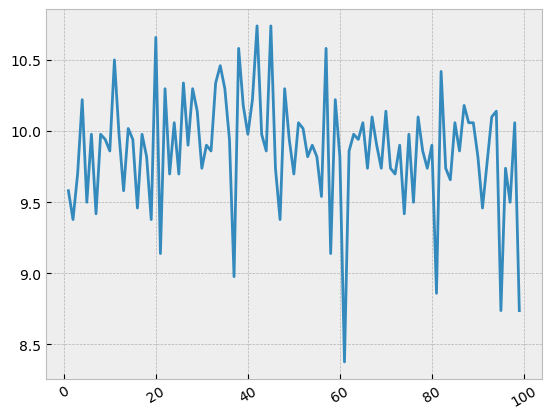

In [5]:
plt.plot(boiler[1:100]['MAIN_FILTER_IN_PRESSURE'])
plt.xticks(rotation=30)
plt.show

In [6]:
boiler.drop(['Date'],axis = 1, inplace = True)

In [7]:
boiler.tail(5)

MAIN_FILTER_IN_PRESSURE
540                10.058544
541                 9.219318
542                10.180172
543                 9.458520
544                 9.900429

In [8]:
# EXTRACT MONTH AND YEAR FROM THE MONTH-YEAR COLUMN
date = pd.date_range(start="2018-01-01", freq = 'D',periods=len(boiler)) # D : Day

In [9]:
date

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-06-20', '2019-06-21', '2019-06-22', '2019-06-23',
               '2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27',
               '2019-06-28', '2019-06-29'],
              dtype='datetime64[ns]', length=545, freq='D')

In [10]:
#split data into comopents
import calendar

In [11]:
boiler['Month']=date.month
boiler['Month']=boiler['Month'].apply(lambda x : calendar.month_abbr[x])

In [12]:
boiler.head(5)

MAIN_FILTER_IN_PRESSURE Month
0                10.338284   Jan
1                 9.580143   Jan
2                 9.377435   Jan
3                 9.697717   Jan
4                10.220714   Jan

In [13]:
boiler['Year']=date.year

In [14]:
boiler.head(5)

MAIN_FILTER_IN_PRESSURE Month  Year
0                10.338284   Jan  2018
1                 9.580143   Jan  2018
2                 9.377435   Jan  2018
3                 9.697717   Jan  2018
4                10.220714   Jan  2018

In [15]:
boiler['Day']=date.day

In [16]:
boiler.head(5)

MAIN_FILTER_IN_PRESSURE Month  Year  Day
0                10.338284   Jan  2018    1
1                 9.580143   Jan  2018    2
2                 9.377435   Jan  2018    3
3                 9.697717   Jan  2018    4
4                10.220714   Jan  2018    5

In [17]:
boiler.rename(columns={'MAIN_FILTER_IN_PRESSURE': 'Pressure'},inplace=True)

In [18]:
boiler.head(5)

Pressure Month  Year  Day
0  10.338284   Jan  2018    1
1   9.580143   Jan  2018    2
2   9.377435   Jan  2018    3
3   9.697717   Jan  2018    4
4  10.220714   Jan  2018    5

In [19]:
boiler = boiler[['Day','Month','Year','Pressure']] ### Changing sequence

In [20]:
boiler.head(5)

Day Month  Year   Pressure
0    1   Jan  2018  10.338284
1    2   Jan  2018   9.580143
2    3   Jan  2018   9.377435
3    4   Jan  2018   9.697717
4    5   Jan  2018  10.220714

In [21]:
# Set Index so that data is usable for time series
boiler.set_index(date, inplace=True)

In [22]:
boiler.head(5)

Day Month  Year   Pressure
2018-01-01    1   Jan  2018  10.338284
2018-01-02    2   Jan  2018   9.580143
2018-01-03    3   Jan  2018   9.377435
2018-01-04    4   Jan  2018   9.697717
2018-01-05    5   Jan  2018  10.220714

<function matplotlib.pyplot.show(close=None, block=None)>

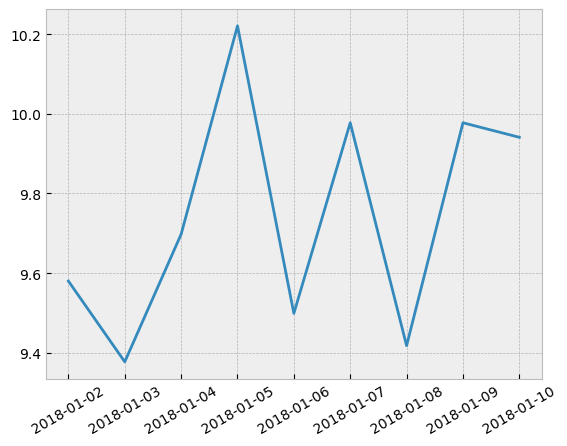

In [23]:
plt.plot(boiler[1:10]['Pressure'])
plt.xticks(rotation=30)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

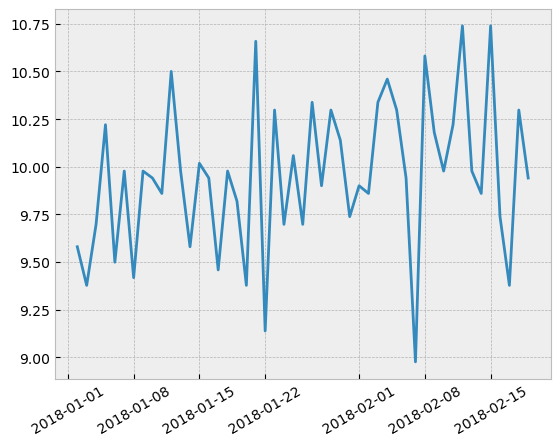

In [24]:
plt.plot(boiler[1:50]['Pressure'])
plt.xticks(rotation=30)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

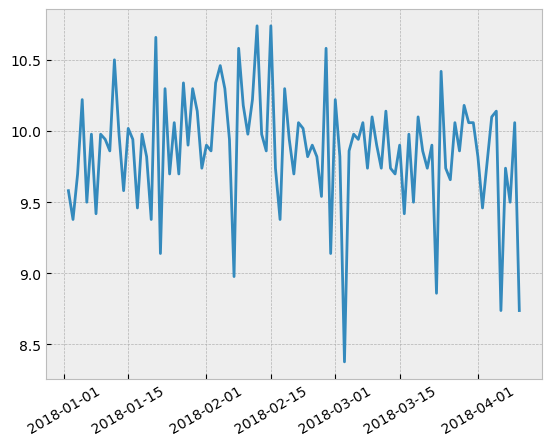

In [25]:
plt.plot(boiler[1:100]['Pressure'])
plt.xticks(rotation=30)
plt.show

In [22]:
#Create a new container for Only Pressure and Index
boiler_ts = boiler['Pressure']

Text(0.5, 1.0, 'Pressure_Value based on Time')

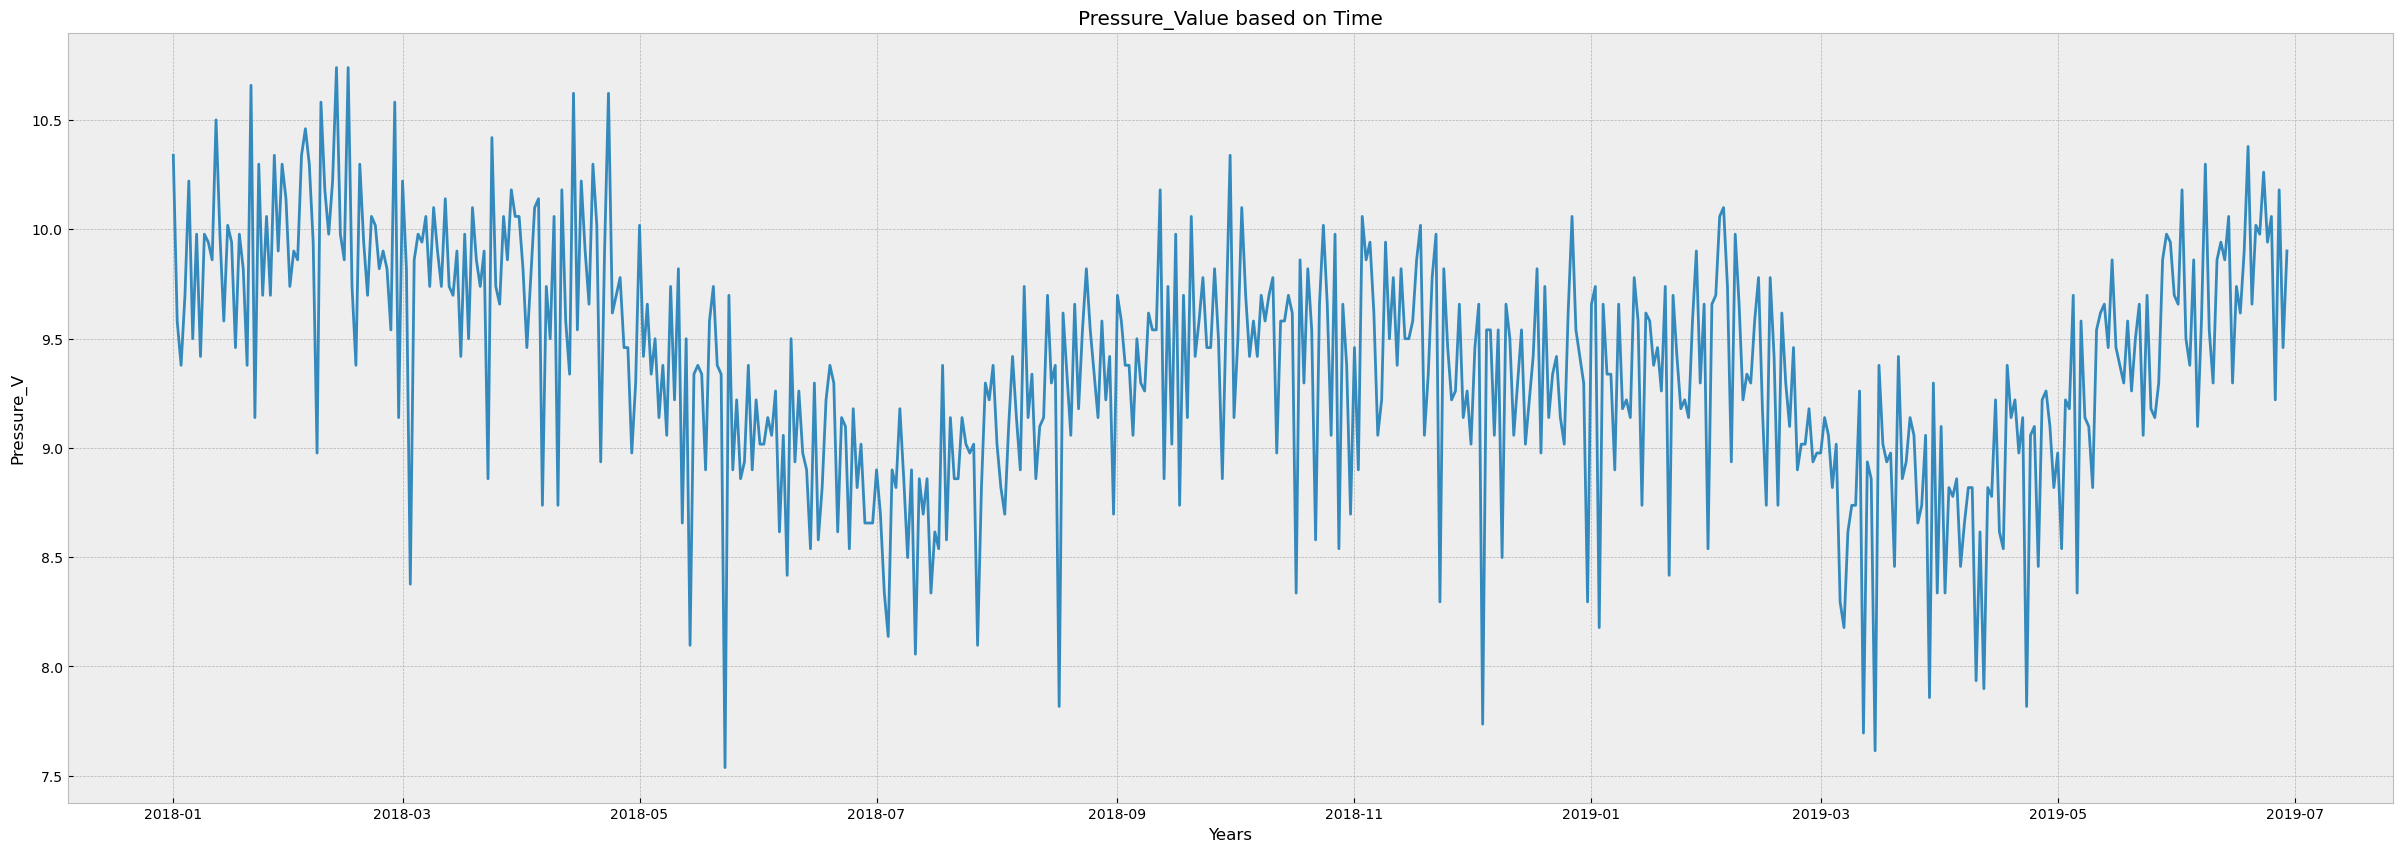

In [27]:
#Plot The TS
plt.figure(figsize=(30,10))
plt.plot(boiler_ts)
plt.xlabel('Years')
plt.ylabel('Pressure_V')
plt.title('Pressure_Value based on Time')

In [23]:
# Add Rolling Statistics like Mean and SD for further analysis
rolmean = boiler_ts.rolling(window = 30).mean()
# 30 days rolling average for studying trend
rolstd  = boiler_ts.rolling(window = 30).std()
# 30 days rolling std dev for studying Variation


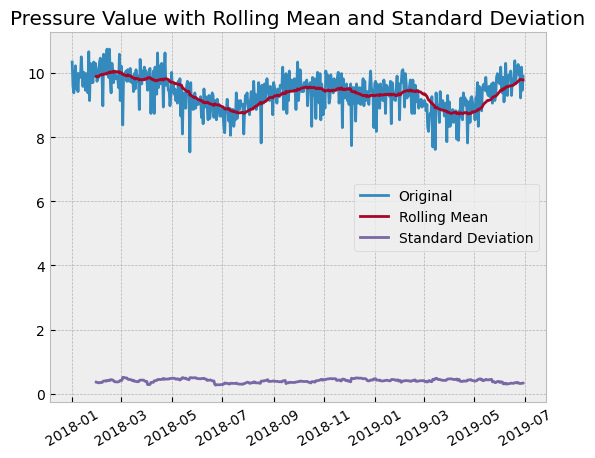

In [24]:
# Plot all above on single chart
orig = plt.plot(boiler_ts, label = "Original")
mean = plt.plot(rolmean, label = "Rolling Mean")
std = plt.plot(rolstd, label = "Standard Deviation")
plt.legend(loc = 'best')
plt.xticks(rotation=30)
plt.title('Pressure Value with Rolling Mean and Standard Deviation')
plt.show()

In [30]:
boiler_s=boiler

In [31]:
boiler_s.head(5)

Day Month  Year   Pressure
2018-01-01    1   Jan  2018  10.338284
2018-01-02    2   Jan  2018   9.580143
2018-01-03    3   Jan  2018   9.377435
2018-01-04    4   Jan  2018   9.697717
2018-01-05    5   Jan  2018  10.220714

In [46]:
# Analyse Data Year and Monthwise; Pivot table is a good option for this data
monthly_boiler=pd.pivot_table(boiler,values='Pressure',columns=['Year','Month'],index='Day')

In [47]:
monthly_boiler

Year        2018                                                       \
Month        Apr       Aug        Dec        Feb        Jan       Jul   
Day                                                                     
1       9.819344  9.016607   9.016607   9.900429  10.338284  8.899033   
2       9.458520  8.817948   9.458520   9.859886   9.580143  8.696321   
3       9.778801  8.696321   9.657174  10.338284   9.377435  8.335497   
4      10.099087  9.097692   7.735468  10.459911   9.697717  8.136839   
5      10.139629  9.417974   9.539604  10.297742  10.220714  8.899033   
6       8.736864  9.138234   9.539604   9.940970   9.499058  8.817948   
7       9.738259  8.899033   9.057149   8.976065   9.977460  9.178777   
8       9.499058  9.738259   9.539604  10.581538   9.417974  8.858491   
9      10.058544  9.138234   8.497663  10.180172   9.977460  8.497663   
10      8.736864  9.336889   9.657174   9.977460   9.940970  8.899033   
11     10.180172  8.858491   9.499058  10.220714   9.859886  8.055754   
12      9.580143  9.097692   9.057149  10.739655  10.500453  8.858491   
13      9.336889  9.138234   9.296350   9.977460   9.977460  8.696321   
14     10.622081  9.697717   9.539604   9.859886   9.580143  8.858491   
15      9.539604  9.296350   9.016607  10.739655  10.018003  8.335497   
16     10.220714  9.377435   9.219318   9.738259   9.940970  8.615236   
17      9.900429  7.816553   9.417974   9.377435   9.458520  8.538209   
18      9.657174  9.616632   9.819344  10.297742   9.977460  9.377435   
19     10.297742  9.336889   8.976065   9.940970   9.819344  8.578748   
20     10.018003  9.057149   9.738259   9.697717   9.377435  9.138234   
21      8.935522  9.657174   9.138234  10.058544  10.658569  8.858491   
22      9.900429  9.178777   9.336889  10.018003   9.138234  8.858491   
23     10.622081  9.539604   9.417974   9.819344  10.297742  9.138234   
24      9.616632  9.819344   9.138234   9.900429   9.697717  9.016607   
25      9.697717  9.539604   9.016607   9.819344  10.058544  8.976065   
26      9.778801  9.336889   9.616632   9.539604   9.697717  9.016607   
27      9.458520  9.138234  10.058544  10.581538  10.338284  8.096296   
28      9.458520  9.580143   9.539604   9.138234   9.900429  8.817948   
29      8.976065  9.219318   9.417974        NaN  10.297742  9.296350   
30      9.296350  9.417974   9.296350        NaN  10.139629  9.219318   
31           NaN  8.696321   8.294955        NaN   9.738259  9.377435   

Year                                                                    \
Month       Jun        Mar        May        Nov        Oct        Sep   
Day                                                                      
1      9.016607  10.220714  10.018003   9.458520   9.138234   9.697717   
2      9.016607   9.819344   9.417974   8.899033   9.499058   9.580143   
3      9.138234   8.376040   9.657174  10.058544  10.099087   9.377435   
4      9.057149   9.859886   9.336889   9.859886   9.697717   9.377435   
5      9.259861   9.977460   9.499058   9.940970   9.417974   9.057149   
6      8.615236   9.940970   9.138234   9.616632   9.580143   9.499058   
7      9.057149  10.058544   9.377435   9.057149   9.417974   9.296350   
8      8.416578   9.738259   9.057149   9.219318   9.697717   9.259861   
9      9.499058  10.099087   9.738259   9.940970   9.580143   9.616632   
10     8.935522   9.900429   9.219318   9.499058   9.697717   9.539604   
11     9.259861   9.738259   9.819344   9.778801   9.778801   9.539604   
12     8.976065  10.139629   8.655779   9.377435   8.976065  10.180172   
13     8.899033   9.738259   9.499058   9.819344   9.580143   8.858491   
14     8.538209   9.697717   8.096296   9.499058   9.580143   9.738259   
15     9.296350   9.900429   9.336889   9.499058   9.697717   9.016607   
16     8.578748   9.417974   9.377435   9.580143   9.616632   9.977460   
17     8.817948   9.977460   9.336889   9.859886   8.335497   8.736864   
18     9.219318   9.499058   8.899033

In [48]:
#monthly_boiler=monthly_boiler[["2018",'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',"2019",'Jan','Feb','Mar','Apr','May','Jun']]

In [49]:
idx = pd.IndexSlice
monthly_boiler_re=monthly_boiler.loc[:,idx[:,['Jan','Feb','Mar','Jun','Jul',"Aug","Sep",'Oct','Nov','Dec']]]
monthly_boiler_re

Year        2018      2019       2018       2019       2018      2019  \
Month        Jan       Jan        Feb        Feb        Mar       Mar   
Day                                                                     
1      10.338284  9.657174   9.900429   9.657174  10.220714  8.976065   
2       9.580143  9.738259   9.859886   9.697717   9.819344  9.138234   
3       9.377435  8.177381  10.338284  10.058544   8.376040  9.057149   
4       9.697717  9.657174  10.459911  10.099087   9.859886  8.817948   
5      10.220714  9.336889  10.297742   9.738259   9.977460  9.016607   
6       9.499058  9.336889   9.940970   8.935522   9.940970  8.294955   
7       9.977460  8.899033   8.976065   9.977460  10.058544  8.177381   
8       9.417974  9.657174  10.581538   9.657174   9.738259  8.615236   
9       9.977460  9.178777  10.180172   9.219318  10.099087  8.736864   
10      9.940970  9.219318   9.977460   9.336889   9.900429  8.736864   
11      9.859886  9.138234  10.220714   9.296350   9.738259  9.259861   
12     10.500453  9.778801  10.739655   9.580143  10.139629  7.694926   
13      9.977460  9.580143   9.977460   9.778801   9.738259  8.935522   
14      9.580143  8.736864   9.859886   9.178777   9.697717  8.858491   
15     10.018003  9.616632  10.739655   8.736864   9.900429  7.613842   
16      9.940970  9.580143   9.738259   9.778801   9.417974  9.377435   
17      9.458520  9.377435   9.377435   9.417974   9.977460  9.016607   
18      9.977460  9.458520  10.297742   8.736864   9.499058  8.935522   
19      9.819344  9.259861   9.940970   9.616632  10.099087  8.976065   
20      9.377435  9.738259   9.697717   9.296350   9.859886  8.457125   
21     10.658569  8.416578  10.058544   9.097692   9.738259  9.417974   
22      9.138234  9.697717  10.018003   9.458520   9.900429  8.858491   
23     10.297742  9.417974   9.819344   8.899033   8.858491  8.935522   
24      9.697717  9.178777   9.900429   9.016607  10.419369  9.138234   
25     10.058544  9.219318   9.819344   9.016607   9.738259  9.057149   
26      9.697717  9.138234   9.539604   9.178777   9.657174  8.655779   
27     10.338284  9.580143  10.581538   8.935522  10.058544  8.736864   
28      9.900429  9.900429   9.138234   8.976065   9.859886  9.057149   
29     10.297742  9.296350        NaN        NaN  10.180172  7.857095   
30     10.139629  9.657174        NaN        NaN  10.058544  9.296350   
31      9.738259  8.538209        NaN        NaN  10.058544  8.335497   

Year       2018       2019      2018                                  \
Month       Jun        Jun       Jul       Aug        Sep        Oct   
Day                                                                    
1      9.016607   9.657174  8.899033  9.016607   9.697717   9.138234   
2      9.016607  10.180172  8.696321  8.817948   9.580143   9.499058   
3      9.138234   9.499058  8.335497  8.696321   9.377435  10.099087   
4      9.057149   9.377435  8.136839  9.097692   9.377435   9.697717   
5      9.259861   9.859886  8.899033  9.417974   9.057149   9.417974   
6      8.615236   9.097692  8.817948  9.138234   9.499058   9.580143   
7      9.057149   9.580143  9.178777  8.899033   9.296350   9.417974   
8      8.416578  10.297742  8.858491  9.738259   9.259861   9.697717   
9      9.499058   9.539604  8.497663  9.138234   9.616632   9.580143   
10     8.935522   9.296350  8.899033  9.336889   9.539604   9.697717   
11     9.259861   9.859886  8.055754  8.858491   9.539604   9.778801   
12     8.976065   9.940970  8.858491  9.097692  10.180172   8.976065   
13     8.899033   9.859886  8.696321  9.138234   8.858491   9.580143   
14     8.538209  10.058544  8.858491  9.697717   9.738259   9.580143   
15     9.296350   9.296350  8.335497  9.296350   9.016607   9.697717   
16     8.578748   9.738259  8.615236  9.377435   9.977460   9.616632   
17     8.817948   9.616632  8.538209  7.816553   8.736864   8.335497   
18     9.219318   9.900429  9.377435  9.616632   9.697717   9.859886   
19   

In [50]:
# To get all the columns and their values of year 2018
monthly_boiler2018 = monthly_boiler.loc[:,monthly_boiler.columns.get_level_values(0).isin([2018])]

In [51]:
monthly_boiler2018

Year        2018                                                       \
Month        Apr       Aug        Dec        Feb        Jan       Jul   
Day                                                                     
1       9.819344  9.016607   9.016607   9.900429  10.338284  8.899033   
2       9.458520  8.817948   9.458520   9.859886   9.580143  8.696321   
3       9.778801  8.696321   9.657174  10.338284   9.377435  8.335497   
4      10.099087  9.097692   7.735468  10.459911   9.697717  8.136839   
5      10.139629  9.417974   9.539604  10.297742  10.220714  8.899033   
6       8.736864  9.138234   9.539604   9.940970   9.499058  8.817948   
7       9.738259  8.899033   9.057149   8.976065   9.977460  9.178777   
8       9.499058  9.738259   9.539604  10.581538   9.417974  8.858491   
9      10.058544  9.138234   8.497663  10.180172   9.977460  8.497663   
10      8.736864  9.336889   9.657174   9.977460   9.940970  8.899033   
11     10.180172  8.858491   9.499058  10.220714   9.859886  8.055754   
12      9.580143  9.097692   9.057149  10.739655  10.500453  8.858491   
13      9.336889  9.138234   9.296350   9.977460   9.977460  8.696321   
14     10.622081  9.697717   9.539604   9.859886   9.580143  8.858491   
15      9.539604  9.296350   9.016607  10.739655  10.018003  8.335497   
16     10.220714  9.377435   9.219318   9.738259   9.940970  8.615236   
17      9.900429  7.816553   9.417974   9.377435   9.458520  8.538209   
18      9.657174  9.616632   9.819344  10.297742   9.977460  9.377435   
19     10.297742  9.336889   8.976065   9.940970   9.819344  8.578748   
20     10.018003  9.057149   9.738259   9.697717   9.377435  9.138234   
21      8.935522  9.657174   9.138234  10.058544  10.658569  8.858491   
22      9.900429  9.178777   9.336889  10.018003   9.138234  8.858491   
23     10.622081  9.539604   9.417974   9.819344  10.297742  9.138234   
24      9.616632  9.819344   9.138234   9.900429   9.697717  9.016607   
25      9.697717  9.539604   9.016607   9.819344  10.058544  8.976065   
26      9.778801  9.336889   9.616632   9.539604   9.697717  9.016607   
27      9.458520  9.138234  10.058544  10.581538  10.338284  8.096296   
28      9.458520  9.580143   9.539604   9.138234   9.900429  8.817948   
29      8.976065  9.219318   9.417974        NaN  10.297742  9.296350   
30      9.296350  9.417974   9.296350        NaN  10.139629  9.219318   
31           NaN  8.696321   8.294955        NaN   9.738259  9.377435   

Year                                                                    
Month       Jun        Mar        May        Nov        Oct        Sep  
Day                                                                     
1      9.016607  10.220714  10.018003   9.458520   9.138234   9.697717  
2      9.016607   9.819344   9.417974   8.899033   9.499058   9.580143  
3      9.138234   8.376040   9.657174  10.058544  10.099087   9.377435  
4      9.057149   9.859886   9.336889   9.859886   9.697717   9.377435  
5      9.259861   9.977460   9.499058   9.940970   9.417974   9.057149  
6      8.615236   9.940970   9.138234   9.616632   9.580143   9.499058  
7      9.057149  10.058544   9.377435   9.057149   9.417974   9.296350  
8      8.416578   9.738259   9.057149   9.219318   9.697717   9.259861  
9      9.499058  10.099087   9.738259   9.940970   9.580143   9.616632  
10     8.935522   9.900429   9.219318   9.499058   9.697717   9.539604  
11     9.259861   9.738259   9.819344   9.778801   9.778801   9.539604  
12     8.976065  10.139629   8.655779   9.377435   8.976065  10.180172  
13     8.899033   9.738259   9.499058   9.819344   9.580143   8.858491  
14     8.538209   9.697717   8.096296   9.499058   9.580143   9.738259  
15     9.296350   9.900429   9.336889   9.499058   9.697717   9.016607  
16     8.578748   9.417974   9.377435   9.580143   9.616632   9.977460  
17     8.817948   9.977460   9.336889   9.859886   8.335497   8.736864  
18     9.219318   9.499058   8.899033  10.018003   9.8598

In [52]:
idx = pd.IndexSlice
monthly_boiler2018=monthly_boiler2018.loc[:,idx[:,['Jan','Feb','Mar','Apr','May','Jun','Jul',"Aug","Sep",'Oct','Nov','Dec']]]
monthly_boiler2018

Year        2018                                                        \
Month        Jan        Feb        Mar        Apr        May       Jun   
Day                                                                      
1      10.338284   9.900429  10.220714   9.819344  10.018003  9.016607   
2       9.580143   9.859886   9.819344   9.458520   9.417974  9.016607   
3       9.377435  10.338284   8.376040   9.778801   9.657174  9.138234   
4       9.697717  10.459911   9.859886  10.099087   9.336889  9.057149   
5      10.220714  10.297742   9.977460  10.139629   9.499058  9.259861   
6       9.499058   9.940970   9.940970   8.736864   9.138234  8.615236   
7       9.977460   8.976065  10.058544   9.738259   9.377435  9.057149   
8       9.417974  10.581538   9.738259   9.499058   9.057149  8.416578   
9       9.977460  10.180172  10.099087  10.058544   9.738259  9.499058   
10      9.940970   9.977460   9.900429   8.736864   9.219318  8.935522   
11      9.859886  10.220714   9.738259  10.180172   9.819344  9.259861   
12     10.500453  10.739655  10.139629   9.580143   8.655779  8.976065   
13      9.977460   9.977460   9.738259   9.336889   9.499058  8.899033   
14      9.580143   9.859886   9.697717  10.622081   8.096296  8.538209   
15     10.018003  10.739655   9.900429   9.539604   9.336889  9.296350   
16      9.940970   9.738259   9.417974  10.220714   9.377435  8.578748   
17      9.458520   9.377435   9.977460   9.900429   9.336889  8.817948   
18      9.977460  10.297742   9.499058   9.657174   8.899033  9.219318   
19      9.819344   9.940970  10.099087  10.297742   9.580143  9.377435   
20      9.377435   9.697717   9.859886  10.018003   9.738259  9.296350   
21     10.658569  10.058544   9.738259   8.935522   9.377435  8.615236   
22      9.138234  10.018003   9.900429   9.900429   9.336889  9.138234   
23     10.297742   9.819344   8.858491  10.622081   7.536814  9.097692   
24      9.697717   9.900429  10.419369   9.616632   9.697717  8.538209   
25     10.058544   9.819344   9.738259   9.697717   8.899033  9.178777   
26      9.697717   9.539604   9.657174   9.778801   9.219318  8.817948   
27     10.338284  10.581538  10.058544   9.458520   8.858491  9.016607   
28      9.900429   9.138234   9.859886   9.458520   8.935522  8.655779   
29     10.297742        NaN  10.180172   8.976065   9.377435  8.655779   
30     10.139629        NaN  10.058544   9.296350   8.899033  8.655779   
31      9.738259        NaN  10.058544        NaN   9.219318       NaN   

Year                                                                   
Month       Jul       Aug        Sep        Oct        Nov        Dec  
Day                                                                    
1      8.899033  9.016607   9.697717   9.138234   9.458520   9.016607  
2      8.696321  8.817948   9.580143   9.499058   8.899033   9.458520  
3      8.335497  8.696321   9.377435  10.099087  10.058544   9.657174  
4      8.136839  9.097692   9.377435   9.697717   9.859886   7.735468  
5      8.899033  9.417974   9.057149   9.417974   9.940970   9.539604  
6      8.817948  9.138234   9.499058   9.580143   9.616632   9.539604  
7      9.178777  8.899033   9.296350   9.417974   9.057149   9.057149  
8      8.858491  9.738259   9.259861   9.697717   9.219318   9.539604  
9      8.497663  9.138234   9.616632   9.580143   9.940970   8.497663  
10     8.899033  9.336889   9.539604   9.697717   9.499058   9.657174  
11     8.055754  8.858491   9.539604   9.778801   9.778801   9.499058  
12     8.858491  9.097692  10.180172   8.976065   9.377435   9.057149  
13     8.696321  9.138234   8.858491   9.580143   9.819344   9.296350  
14     8.858491  9.697717   9.738259   9.580143   9.499058   9.539604  
15     8.335497  9.296350   9.016607   9.697717   9.499058   9.016607  
16     8.615236  9.377435   9.977460   9.616632   9.580143   9.219318  
17     8.538209  7.816553   8.736864   8.335497   9.859886   9.417974  
18     9.377435  9.616632   9.697717   9.85

In [53]:
# To get all the columns and their values of year 2019
monthly_boiler2019 = monthly_boiler.loc[:,monthly_boiler.columns.get_level_values(0).isin([2019])]


In [54]:
monthly_boiler2019

Year       2019                                                    
Month       Apr        Feb       Jan        Jun       Mar       May
Day                                                                
1      9.097692   9.657174  9.657174   9.657174  8.976065  8.976065
2      8.335497   9.697717  9.738259  10.180172  9.138234  8.538209
3      8.817948  10.058544  8.177381   9.499058  9.057149  9.219318
4      8.777406  10.099087  9.657174   9.377435  8.817948  9.178777
5      8.858491   9.738259  9.336889   9.859886  9.016607  9.697717
6      8.457125   8.935522  9.336889   9.097692  8.294955  8.335497
7      8.655779   9.977460  8.899033   9.580143  8.177381  9.580143
8      8.817948   9.657174  9.657174  10.297742  8.615236  9.138234
9      8.817948   9.219318  9.178777   9.539604  8.736864  9.097692
10     7.934127   9.336889  9.219318   9.296350  8.736864  8.817948
11     8.615236   9.296350  9.138234   9.859886  9.259861  9.539604
12     7.897638   9.580143  9.778801   9.940970  7.694926  9.616632
13     8.817948   9.778801  9.580143   9.859886  8.935522  9.657174
14     8.777406   9.178777  8.736864  10.058544  8.858491  9.458520
15     9.219318   8.736864  9.616632   9.296350  7.613842  9.859886
16     8.615236   9.778801  9.580143   9.738259  9.377435  9.458520
17     8.538209   9.417974  9.377435   9.616632  9.016607  9.377435
18     9.377435   8.736864  9.458520   9.900429  8.935522  9.296350
19     9.138234   9.616632  9.259861  10.378826  8.976065  9.580143
20     9.219318   9.296350  9.738259   9.657174  8.457125  9.259861
21     8.976065   9.097692  8.416578  10.018003  9.417974  9.499058
22     9.138234   9.458520  9.697717   9.977460  8.858491  9.657174
23     7.816553   8.899033  9.417974  10.261256  8.935522  9.057149
24     9.057149   9.016607  9.178777   9.940970  9.138234  9.697717
25     9.097692   9.016607  9.219318  10.058544  9.057149  9.178777
26     8.457125   9.178777  9.138234   9.219318  8.655779  9.138234
27     9.219318   8.935522  9.580143  10.180172  8.736864  9.296350
28     9.259861   8.976065  9.900429   9.458520  9.057149  9.859886
29     9.097692        NaN  9.296350   9.900429  7.857095  9.977460
30     8.817948        NaN  9.657174        NaN  9.296350  9.940970
31          NaN        NaN  8.538209        NaN  8.335497  9.697717

In [55]:
idx = pd.IndexSlice
monthly_boiler2019=monthly_boiler2019.loc[:,idx[:,['Jan','Feb','Mar','Apr','May','Jun']]]

In [62]:
monthly_boiler2019

Year       2019                                                    
Month       Jan        Feb       Mar       Apr       May        Jun
Day                                                                
1      9.657174   9.657174  8.976065  9.097692  8.976065   9.657174
2      9.738259   9.697717  9.138234  8.335497  8.538209  10.180172
3      8.177381  10.058544  9.057149  8.817948  9.219318   9.499058
4      9.657174  10.099087  8.817948  8.777406  9.178777   9.377435
5      9.336889   9.738259  9.016607  8.858491  9.697717   9.859886
6      9.336889   8.935522  8.294955  8.457125  8.335497   9.097692
7      8.899033   9.977460  8.177381  8.655779  9.580143   9.580143
8      9.657174   9.657174  8.615236  8.817948  9.138234  10.297742
9      9.178777   9.219318  8.736864  8.817948  9.097692   9.539604
10     9.219318   9.336889  8.736864  7.934127  8.817948   9.296350
11     9.138234   9.296350  9.259861  8.615236  9.539604   9.859886
12     9.778801   9.580143  7.694926  7.897638  9.616632   9.940970
13     9.580143   9.778801  8.935522  8.817948  9.657174   9.859886
14     8.736864   9.178777  8.858491  8.777406  9.458520  10.058544
15     9.616632   8.736864  7.613842  9.219318  9.859886   9.296350
16     9.580143   9.778801  9.377435  8.615236  9.458520   9.738259
17     9.377435   9.417974  9.016607  8.538209  9.377435   9.616632
18     9.458520   8.736864  8.935522  9.377435  9.296350   9.900429
19     9.259861   9.616632  8.976065  9.138234  9.580143  10.378826
20     9.738259   9.296350  8.457125  9.219318  9.259861   9.657174
21     8.416578   9.097692  9.417974  8.976065  9.499058  10.018003
22     9.697717   9.458520  8.858491  9.138234  9.657174   9.977460
23     9.417974   8.899033  8.935522  7.816553  9.057149  10.261256
24     9.178777   9.016607  9.138234  9.057149  9.697717   9.940970
25     9.219318   9.016607  9.057149  9.097692  9.178777  10.058544
26     9.138234   9.178777  8.655779  8.457125  9.138234   9.219318
27     9.580143   8.935522  8.736864  9.219318  9.296350  10.180172
28     9.900429   8.976065  9.057149  9.259861  9.859886   9.458520
29     9.296350        NaN  7.857095  9.097692  9.977460   9.900429
30     9.657174        NaN  9.296350  8.817948  9.940970        NaN
31     8.538209        NaN  8.335497       NaN  9.697717        NaN

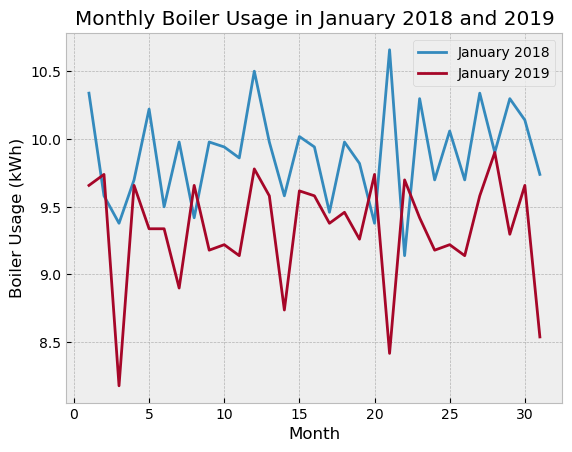

In [102]:
monthly_boiler2018_jan = monthly_boiler2018.loc[:, idx[:, ['Jan']]]
monthly_boiler2019_jan = monthly_boiler2019.loc[:, idx[:, ['Jan']]]

# Plot the data for January 2018
plt.plot(monthly_boiler2018_jan.index, monthly_boiler2018_jan.values, label='January 2018')
# Plot the data for January 2019
plt.plot(monthly_boiler2019_jan.index, monthly_boiler2019_jan.values, label='January 2019')
plt.title('Monthly Boiler Usage in January 2018 and 2019')
plt.xlabel('Month')
plt.ylabel('Boiler Usage (kWh)')
plt.legend()
plt.show()

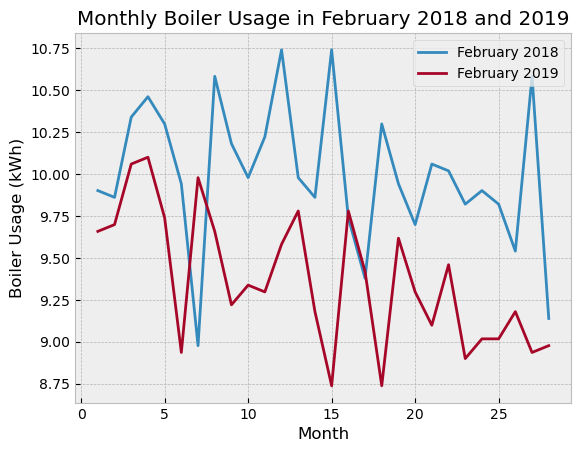

In [101]:
monthly_boiler2018_feb = monthly_boiler2018.loc[:, idx[:, ['Feb']]]
monthly_boiler2019_feb = monthly_boiler2019.loc[:, idx[:, ['Feb']]]

# Plot the data for February 2018
plt.plot(monthly_boiler2018_feb.index, monthly_boiler2018_feb.values, label='February 2018')
# Plot the data for February 2019
plt.plot(monthly_boiler2019_feb.index, monthly_boiler2019_feb.values, label='February 2019')
plt.title('Monthly Boiler Usage in February 2018 and 2019')
plt.xlabel('Month')
plt.ylabel('Boiler Usage (kWh)')
plt.legend()
plt.show()

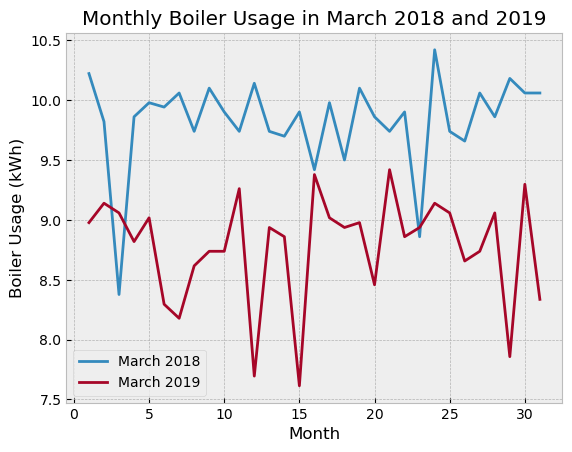

In [100]:
monthly_boiler2018_mar = monthly_boiler2018.loc[:, idx[:, ['Mar']]]
monthly_boiler2019_mar = monthly_boiler2019.loc[:, idx[:, ['Mar']]]

# Plot the data for March 2018
plt.plot(monthly_boiler2018_mar.index, monthly_boiler2018_mar.values, label='March 2018')
# Plot the data for March 2019
plt.plot(monthly_boiler2019_mar.index, monthly_boiler2019_mar.values, label='March 2019')
plt.title('Monthly Boiler Usage in March 2018 and 2019')
plt.xlabel('Month')
plt.ylabel('Boiler Usage (kWh)')
plt.legend()
plt.show()

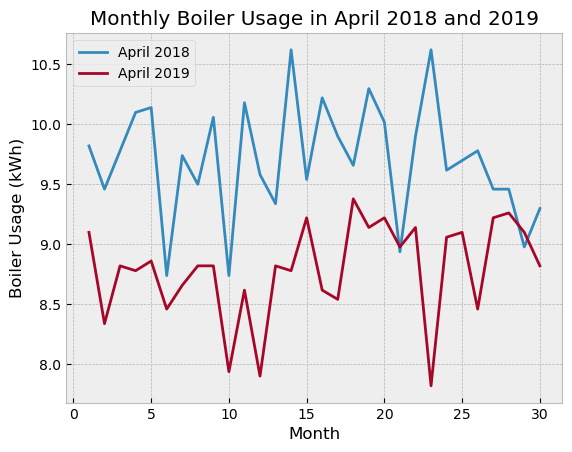

In [99]:
monthly_boiler2018_apr = monthly_boiler2018.loc[:, idx[:, ['Apr']]]
monthly_boiler2019_apr = monthly_boiler2019.loc[:, idx[:, ['Apr']]]

# Plot the data for April 2018
plt.plot(monthly_boiler2018_apr.index, monthly_boiler2018_apr.values, label='April 2018')
# Plot the data for April 2019
plt.plot(monthly_boiler2019_apr.index, monthly_boiler2019_apr.values, label='April 2019')
plt.title('Monthly Boiler Usage in April 2018 and 2019')
plt.xlabel('Month')
plt.ylabel('Boiler Usage (kWh)')
plt.legend()
plt.show()

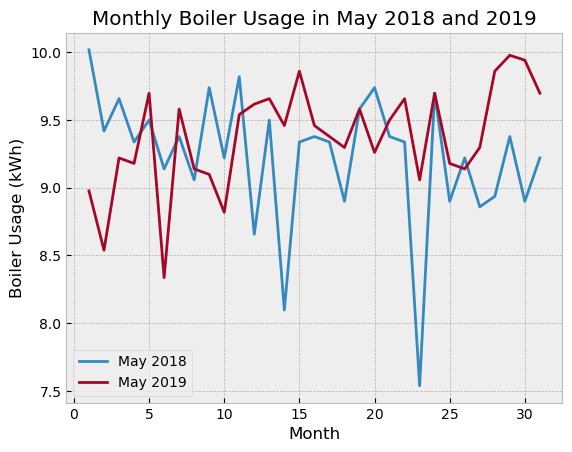

In [104]:
monthly_boiler2018_may = monthly_boiler2018.loc[:, idx[:, ['May']]]
monthly_boiler2019_may = monthly_boiler2019.loc[:, idx[:, ['May']]]

# Plot the data for May 2018
plt.plot(monthly_boiler2018_may.index, monthly_boiler2018_may.values, label='May 2018')
# Plot the data for May 2019
plt.plot(monthly_boiler2019_may.index, monthly_boiler2019_may.values, label='May 2019')
plt.title('Monthly Boiler Usage in May 2018 and 2019')
plt.xlabel('Month')
plt.ylabel('Boiler Usage (kWh)')
plt.legend()
plt.show()

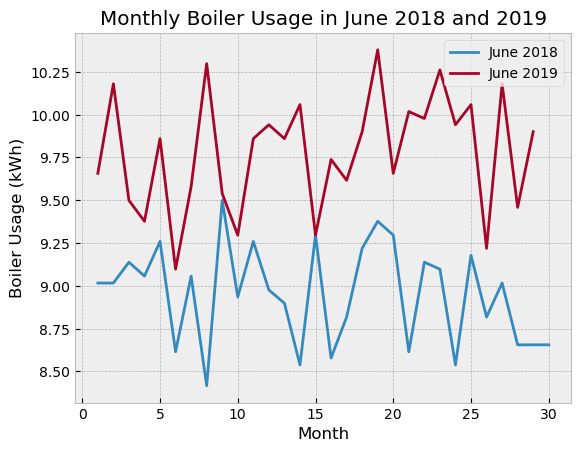

In [106]:
monthly_boiler2018_jun = monthly_boiler2018.loc[:, idx[:, ['Jun']]]
monthly_boiler2019_jun = monthly_boiler2019.loc[:, idx[:, ['Jun']]]

# Plot the data for May 2018
plt.plot(monthly_boiler2018_jun.index, monthly_boiler2018_jun.values, label='June 2018')
# Plot the data for May 2019
plt.plot(monthly_boiler2019_jun.index, monthly_boiler2019_jun.values, label='June 2019')
plt.title('Monthly Boiler Usage in June 2018 and 2019')
plt.xlabel('Month')
plt.ylabel('Boiler Usage (kWh)')
plt.legend()
plt.show()

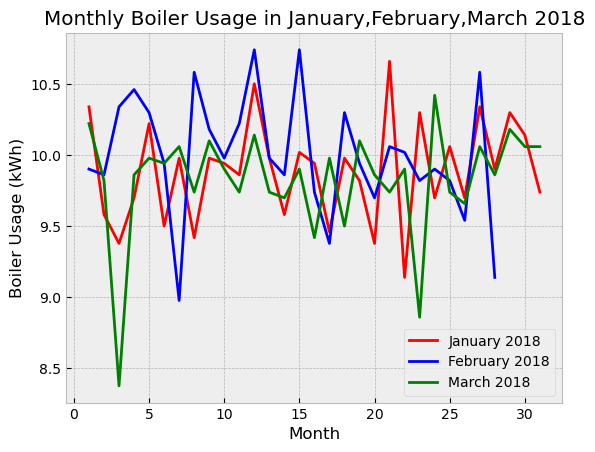

In [115]:
monthly_boiler2018_jan = monthly_boiler2018.loc[:, idx[:, ['Jan']]]
monthly_boiler2018_feb = monthly_boiler2018.loc[:, idx[:, ['Feb']]]
monthly_boiler2018_mar = monthly_boiler2018.loc[:, idx[:, ['Mar']]]

# Plot the data for May 2018
plt.plot(monthly_boiler2018_jan.index, monthly_boiler2018_jan.values, color='red', label='January 2018')
plt.plot(monthly_boiler2018_feb.index, monthly_boiler2018_feb.values, color='blue', label='February 2018')
plt.plot(monthly_boiler2018_mar.index, monthly_boiler2018_mar.values, color='green', label='March 2018')
# Plot the data for May 2019
# plt.plot(monthly_boiler2019_may.index, monthly_boiler2019_may.values, label='May 2019')
plt.title('Monthly Boiler Usage in January,February,March 2018')
plt.xlabel('Month')
plt.ylabel('Boiler Usage (kWh)')
plt.legend()
plt.show()

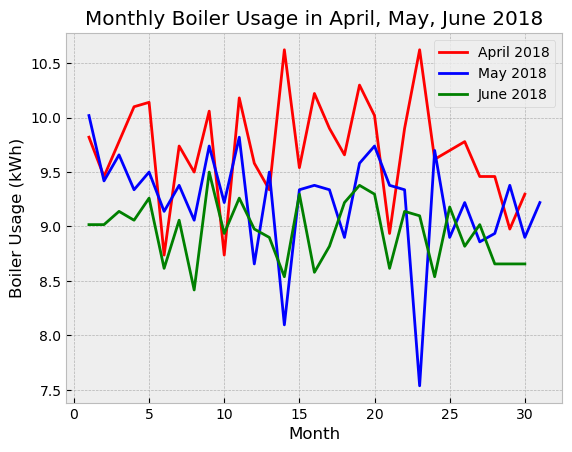

In [118]:
monthly_boiler2018_apr = monthly_boiler2018.loc[:, idx[:, ['Apr']]]
monthly_boiler2018_may = monthly_boiler2018.loc[:, idx[:, ['May']]]
monthly_boiler2018_jun = monthly_boiler2018.loc[:, idx[:, ['Jun']]]

# Plot the data for May 2018
plt.plot(monthly_boiler2018_apr.index, monthly_boiler2018_apr.values, color='red', label='April 2018')
plt.plot(monthly_boiler2018_may.index, monthly_boiler2018_may.values, color='blue', label='May 2018')
plt.plot(monthly_boiler2018_jun.index, monthly_boiler2018_jun.values, color='green', label='June 2018')
# Plot the data for May 2019
# plt.plot(monthly_boiler2019_may.index, monthly_boiler2019_may.values, label='May 2019')
plt.title('Monthly Boiler Usage in April, May, June 2018')
plt.xlabel('Month')
plt.ylabel('Boiler Usage (kWh)')
plt.legend()
plt.show()

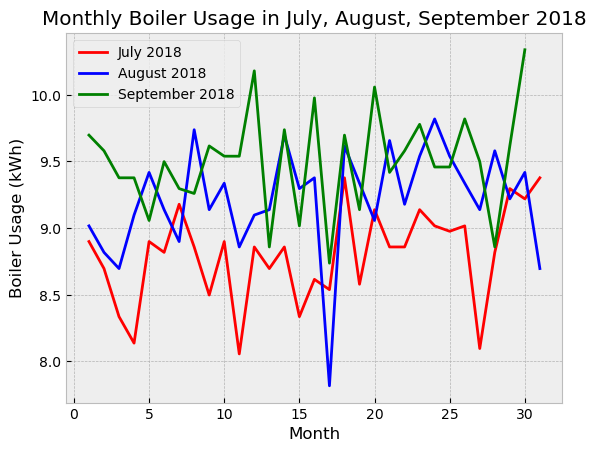

In [119]:
monthly_boiler2018_jul = monthly_boiler2018.loc[:, idx[:, ['Jul']]]
monthly_boiler2018_aug = monthly_boiler2018.loc[:, idx[:, ['Aug']]]
monthly_boiler2018_sep = monthly_boiler2018.loc[:, idx[:, ['Sep']]]

# Plot the data for May 2018
plt.plot(monthly_boiler2018_jul.index, monthly_boiler2018_jul.values, color='red', label='July 2018')
plt.plot(monthly_boiler2018_aug.index, monthly_boiler2018_aug.values, color='blue', label='August 2018')
plt.plot(monthly_boiler2018_sep.index, monthly_boiler2018_sep.values, color='green', label='September 2018')
# Plot the data for May 2019
# plt.plot(monthly_boiler2019_may.index, monthly_boiler2019_may.values, label='May 2019')
plt.title('Monthly Boiler Usage in July, August, September 2018')
plt.xlabel('Month')
plt.ylabel('Boiler Usage (kWh)')
plt.legend()
plt.show()

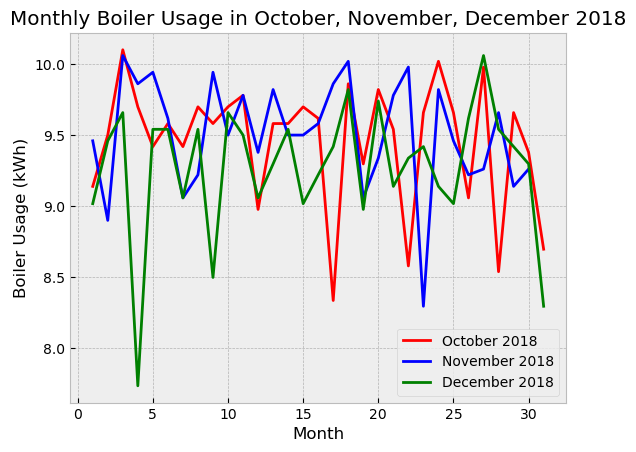

In [120]:
monthly_boiler2018_oct = monthly_boiler2018.loc[:, idx[:, ['Oct']]]
monthly_boiler2018_nov = monthly_boiler2018.loc[:, idx[:, ['Nov']]]
monthly_boiler2018_dec = monthly_boiler2018.loc[:, idx[:, ['Dec']]]

# Plot the data for May 2018
plt.plot(monthly_boiler2018_oct.index, monthly_boiler2018_oct.values, color='red', label='October 2018')
plt.plot(monthly_boiler2018_nov.index, monthly_boiler2018_nov.values, color='blue', label='November 2018')
plt.plot(monthly_boiler2018_dec.index, monthly_boiler2018_dec.values, color='green', label='December 2018')
# Plot the data for May 2019
# plt.plot(monthly_boiler2019_may.index, monthly_boiler2019_may.values, label='May 2019')
plt.title('Monthly Boiler Usage in October, November, December 2018')
plt.xlabel('Month')
plt.ylabel('Boiler Usage (kWh)')
plt.legend()
plt.show()

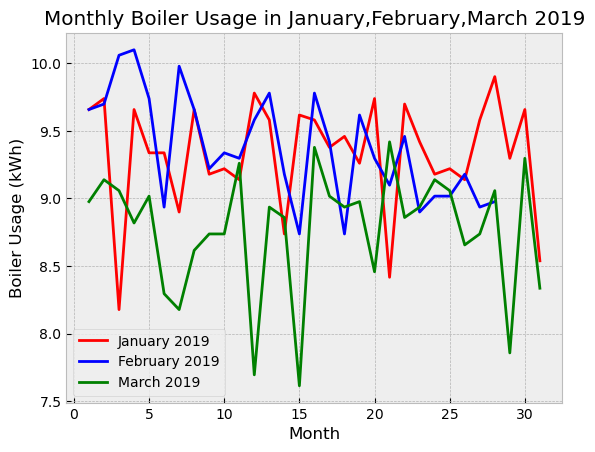

In [121]:
monthly_boiler2019_jan = monthly_boiler2019.loc[:, idx[:, ['Jan']]]
monthly_boiler2019_feb = monthly_boiler2019.loc[:, idx[:, ['Feb']]]
monthly_boiler2019_mar = monthly_boiler2019.loc[:, idx[:, ['Mar']]]

# Plot the data for May 2018
plt.plot(monthly_boiler2019_jan.index, monthly_boiler2019_jan.values, color='red', label='January 2019')
plt.plot(monthly_boiler2019_feb.index, monthly_boiler2019_feb.values, color='blue', label='February 2019')
plt.plot(monthly_boiler2019_mar.index, monthly_boiler2019_mar.values, color='green', label='March 2019')
# Plot the data for May 2019
# plt.plot(monthly_boiler2019_may.index, monthly_boiler2019_may.values, label='May 2019')
plt.title('Monthly Boiler Usage in January,February,March 2019')
plt.xlabel('Month')
plt.ylabel('Boiler Usage (kWh)')
plt.legend()
plt.show()

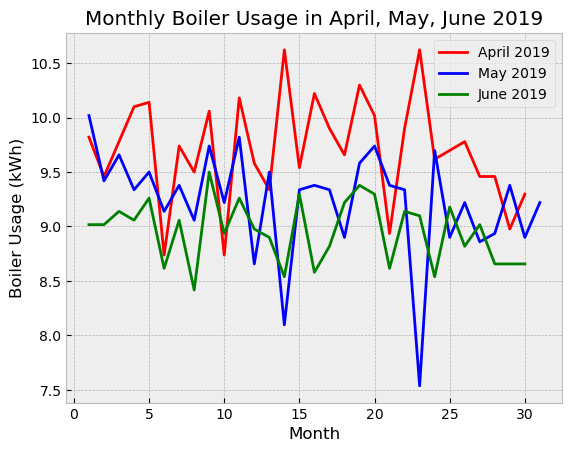

In [123]:
monthly_boiler2019_apr = monthly_boiler2018.loc[:, idx[:, ['Apr']]]
monthly_boiler2019_may = monthly_boiler2018.loc[:, idx[:, ['May']]]
monthly_boiler2019_jun = monthly_boiler2018.loc[:, idx[:, ['Jun']]]


plt.plot(monthly_boiler2019_apr.index, monthly_boiler2019_apr.values, color='red', label='April 2019')
plt.plot(monthly_boiler2019_may.index, monthly_boiler2019_may.values, color='blue', label='May 2019')
plt.plot(monthly_boiler2019_jun.index, monthly_boiler2019_jun.values, color='green', label='June 2019')

plt.title('Monthly Boiler Usage in April, May, June 2019')
plt.xlabel('Month')
plt.ylabel('Boiler Usage (kWh)')
plt.legend()
plt.show()

<Axes: >

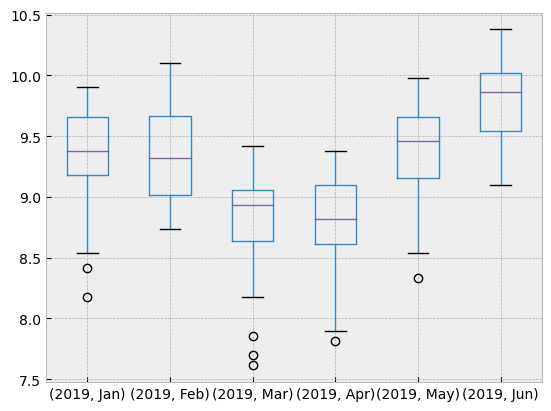

In [95]:
monthly_boiler2019.boxplot()

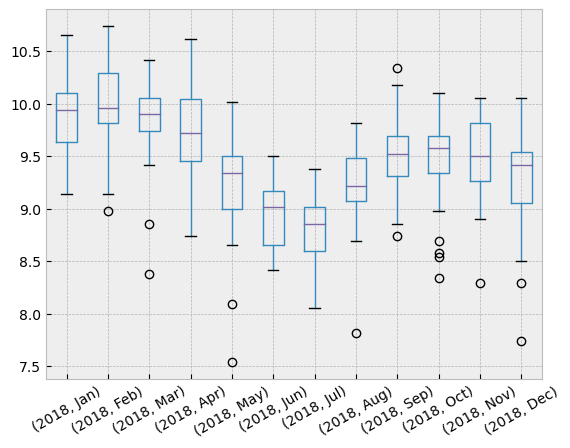

In [57]:
monthly_boiler2018.boxplot()
plt.xticks(rotation=30)
plt.show()

In [58]:
monthly_boiler_re

Year        2018      2019       2018       2019       2018      2019  \
Month        Jan       Jan        Feb        Feb        Mar       Mar   
Day                                                                     
1      10.338284  9.657174   9.900429   9.657174  10.220714  8.976065   
2       9.580143  9.738259   9.859886   9.697717   9.819344  9.138234   
3       9.377435  8.177381  10.338284  10.058544   8.376040  9.057149   
4       9.697717  9.657174  10.459911  10.099087   9.859886  8.817948   
5      10.220714  9.336889  10.297742   9.738259   9.977460  9.016607   
6       9.499058  9.336889   9.940970   8.935522   9.940970  8.294955   
7       9.977460  8.899033   8.976065   9.977460  10.058544  8.177381   
8       9.417974  9.657174  10.581538   9.657174   9.738259  8.615236   
9       9.977460  9.178777  10.180172   9.219318  10.099087  8.736864   
10      9.940970  9.219318   9.977460   9.336889   9.900429  8.736864   
11      9.859886  9.138234  10.220714   9.296350   9.738259  9.259861   
12     10.500453  9.778801  10.739655   9.580143  10.139629  7.694926   
13      9.977460  9.580143   9.977460   9.778801   9.738259  8.935522   
14      9.580143  8.736864   9.859886   9.178777   9.697717  8.858491   
15     10.018003  9.616632  10.739655   8.736864   9.900429  7.613842   
16      9.940970  9.580143   9.738259   9.778801   9.417974  9.377435   
17      9.458520  9.377435   9.377435   9.417974   9.977460  9.016607   
18      9.977460  9.458520  10.297742   8.736864   9.499058  8.935522   
19      9.819344  9.259861   9.940970   9.616632  10.099087  8.976065   
20      9.377435  9.738259   9.697717   9.296350   9.859886  8.457125   
21     10.658569  8.416578  10.058544   9.097692   9.738259  9.417974   
22      9.138234  9.697717  10.018003   9.458520   9.900429  8.858491   
23     10.297742  9.417974   9.819344   8.899033   8.858491  8.935522   
24      9.697717  9.178777   9.900429   9.016607  10.419369  9.138234   
25     10.058544  9.219318   9.819344   9.016607   9.738259  9.057149   
26      9.697717  9.138234   9.539604   9.178777   9.657174  8.655779   
27     10.338284  9.580143  10.581538   8.935522  10.058544  8.736864   
28      9.900429  9.900429   9.138234   8.976065   9.859886  9.057149   
29     10.297742  9.296350        NaN        NaN  10.180172  7.857095   
30     10.139629  9.657174        NaN        NaN  10.058544  9.296350   
31      9.738259  8.538209        NaN        NaN  10.058544  8.335497   

Year       2018       2019      2018                                  \
Month       Jun        Jun       Jul       Aug        Sep        Oct   
Day                                                                    
1      9.016607   9.657174  8.899033  9.016607   9.697717   9.138234   
2      9.016607  10.180172  8.696321  8.817948   9.580143   9.499058   
3      9.138234   9.499058  8.335497  8.696321   9.377435  10.099087   
4      9.057149   9.377435  8.136839  9.097692   9.377435   9.697717   
5      9.259861   9.859886  8.899033  9.417974   9.057149   9.417974   
6      8.615236   9.097692  8.817948  9.138234   9.499058   9.580143   
7      9.057149   9.580143  9.178777  8.899033   9.296350   9.417974   
8      8.416578  10.297742  8.858491  9.738259   9.259861   9.697717   
9      9.499058   9.539604  8.497663  9.138234   9.616632   9.580143   
10     8.935522   9.296350  8.899033  9.336889   9.539604   9.697717   
11     9.259861   9.859886  8.055754  8.858491   9.539604   9.778801   
12     8.976065   9.940970  8.858491  9.097692  10.180172   8.976065   
13     8.899033   9.859886  8.696321  9.138234   8.858491   9.580143   
14     8.538209  10.058544  8.858491  9.697717   9.738259   9.580143   
15     9.296350   9.296350  8.335497  9.296350   9.016607   9.697717   
16     8.578748   9.738259  8.615236  9.377435   9.977460   9.616632   
17     8.817948   9.616632  8.538209  7.816553   8.736864   8.335497   
18     9.219318   9.900429  9.377435  9.616632   9.697717   9.859886   
19   

In [59]:
monthly_boiler_re.isna().sum()

Year  Month
2018  Jan      0
2019  Jan      0
2018  Feb      3
2019  Feb      3
2018  Mar      0
2019  Mar      0
2018  Jun      1
2019  Jun      2
2018  Jul      0
      Aug      0
      Sep      1
      Oct      0
      Nov      1
      Dec      0
dtype: int64

In [60]:
monthly_boiler_re.shape

(31, 14)

In [47]:
boiler_ts=boiler_s['Pressure']

In [165]:
boiler_ts.head()

2018-01-01    10.338284
2018-01-02     9.580143
2018-01-03     9.377435
2018-01-04     9.697717
2018-01-05    10.220714
Freq: D, Name: Pressure, dtype: float64

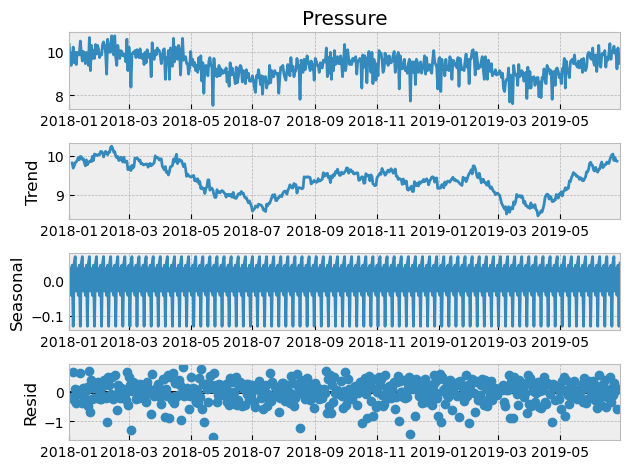

In [49]:
decomposition = sm.tsa.seasonal_decompose(boiler_ts,model='addititve')
fig = decomposition.plot()

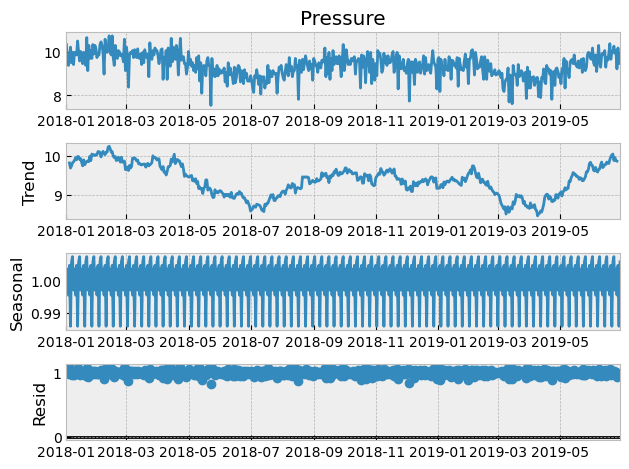

In [50]:
decomposition = sm.tsa.seasonal_decompose(boiler_ts,model='multiplicative')
fig = decomposition.plot()

## Looks like a multiplicative model since seasonal variation exists!

### Also, looks like stationarity(For AR ) and invertibility(For MA) exists in the data !!

In [108]:
q=d=range(0,2) #year flcuation
p = range(0,5) # month flcuation

In [109]:
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1),
 (2, 0, 0),
 (2, 0, 1),
 (2, 1, 0),
 (2, 1, 1),
 (3, 0, 0),
 (3, 0, 1),
 (3, 1, 0),
 (3, 1, 1),
 (4, 0, 0),
 (4, 0, 1),
 (4, 1, 0),
 (4, 1, 1)]

In [110]:
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (3, 0, 0, 12),
 (3, 0, 1, 12),
 (3, 1, 0, 12),
 (3, 1, 1, 12),
 (4, 0, 0, 12),
 (4, 0, 1, 12),
 (4, 1, 0, 12),
 (4, 1, 1, 12)]

In [111]:
## Simply to give you a flavour of how the various combination can be printed !!
print('Examples of parameter combination for seasonal Arima')
print('SARIMAX:{} x {} '.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX:{} x {} '.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX:{} x {} '.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combination for seasonal Arima
SARIMAX:(0, 0, 1) x (0, 0, 1, 12) 
SARIMAX:(0, 0, 1) x (0, 1, 0, 12) 
SARIMAX:(0, 1, 0) x (0, 0, 1, 12) 


In [112]:
warnings.filterwarnings("ignore")
AIC=[]
SARIMAX_model=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(boiler_ts, order=param,seasonal_order=param_seasonal,
                                           enforce_stationarity=False, enforce_invertibility=False)
            results=mod.fit()
            print('SARIMAX:{} x {} - AIC : {}'.format(param,param_seasonal,results.aic), end = '\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [113]:
print('The smallest AIC is {} for model SARIMAX {} x {}'.format(min(AIC),
                                                            SARIMAX_model[AIC.index(min(AIC))][0],
                                                            SARIMAX_model[AIC.index(min(AIC))][1]))
                                                        

The smallest AIC is 528.1854061651194 for model SARIMAX (1, 1, 1) x (4, 0, 0, 12)


In [114]:
mod_final = sm.tsa.statespace.SARIMAX(boiler_ts,order=SARIMAX_model[AIC.index(min(AIC))][0],
                                     seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                     enforce_stationarity=False,
                                     enforce_invertibility=False)

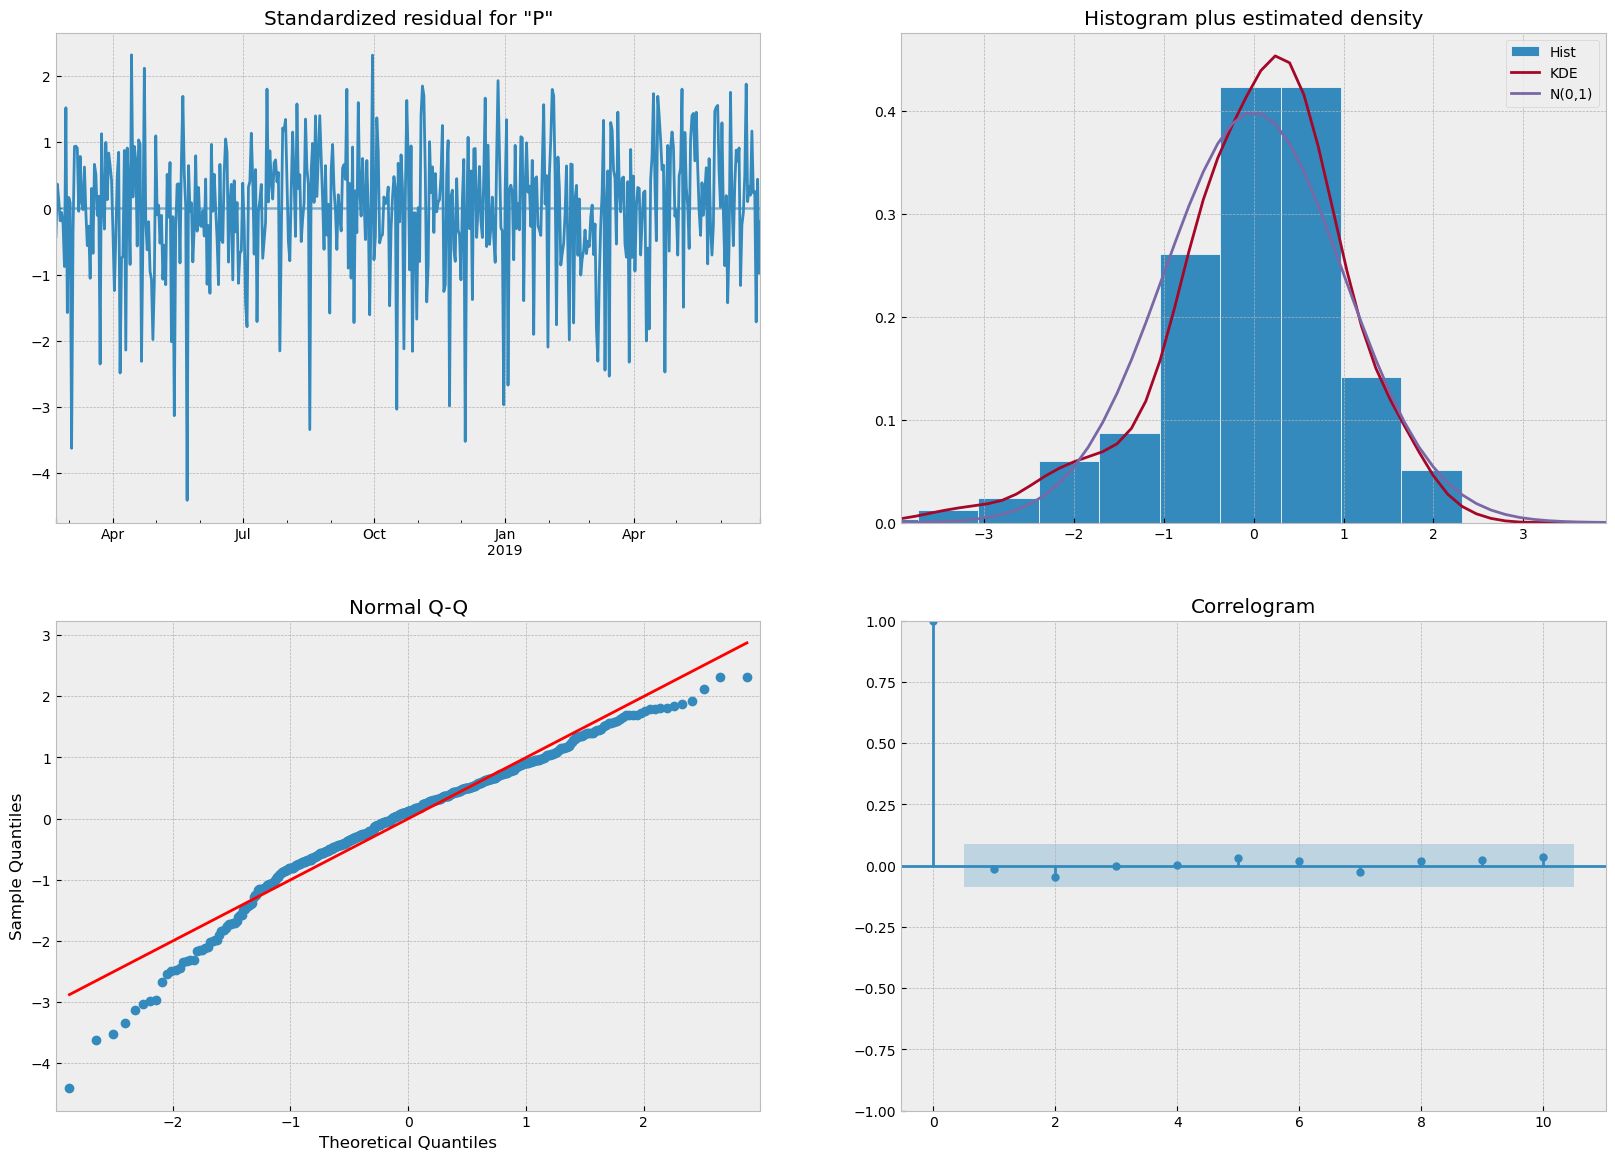

In [115]:
results=mod_final.fit()
results.plot_diagnostics(figsize=(20,14))
plt.show()

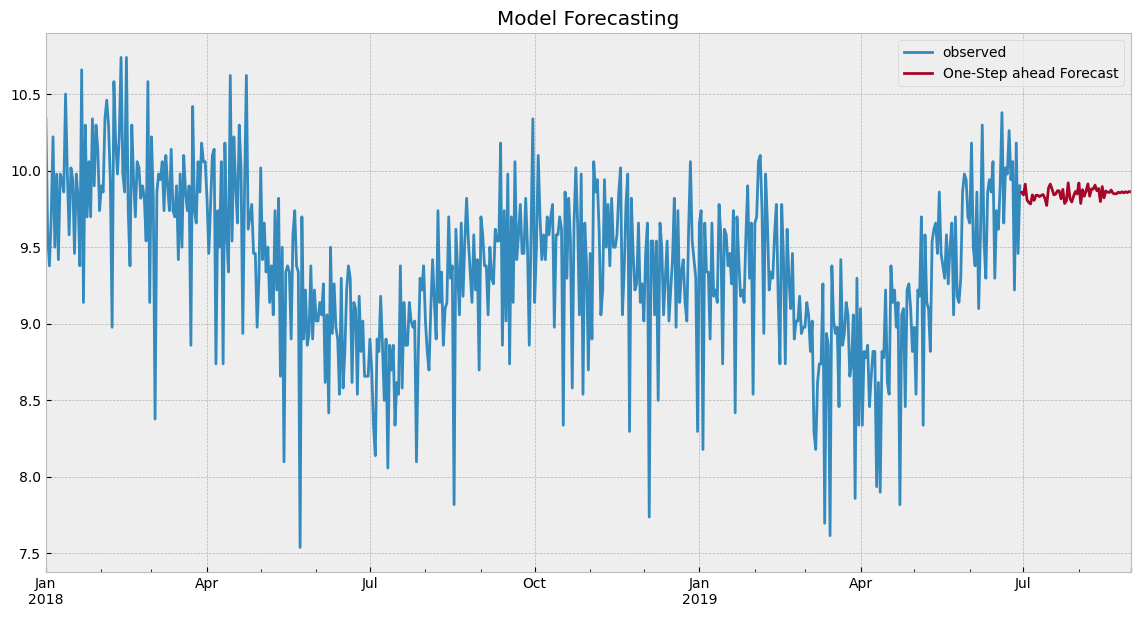

In [136]:
# 6/29/2019
pred = results.get_prediction(start=pd.to_datetime('2019-06-30'),end = pd.to_datetime('2019-08-30'),dynamic = True)
ax=boiler_ts.plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-Step ahead Forecast',lw=2,alpha=1,figsize=(14,7))
plt.title('Model Forecasting')
plt.legend(loc='best')

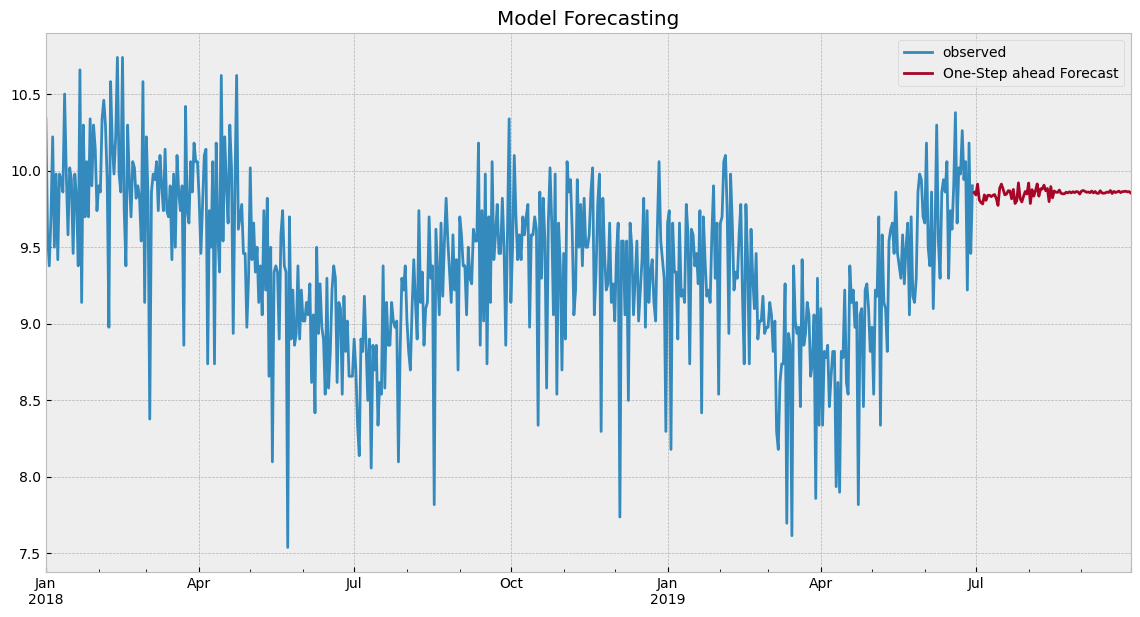

In [137]:
pred2 = results.get_forecast('2019-09-30') ## date till forecast is required
ax=boiler_ts.plot(label='observed')
pred2.predicted_mean.plot(ax=ax,label='One-Step ahead Forecast',lw=2,alpha=1,figsize=(14,7))
plt.title('Model Forecasting')
plt.legend(loc='best')

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

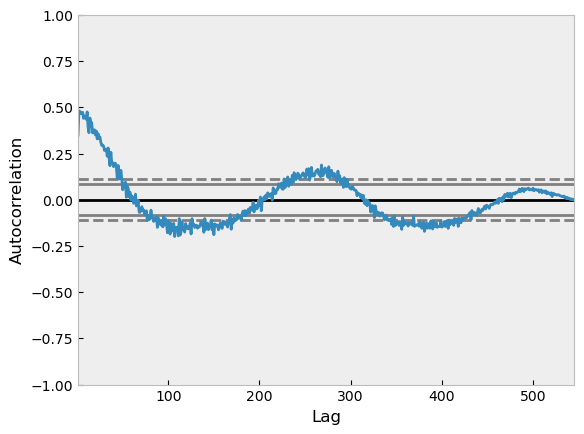

In [119]:
pd.plotting.autocorrelation_plot(boiler["Pressure"])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):

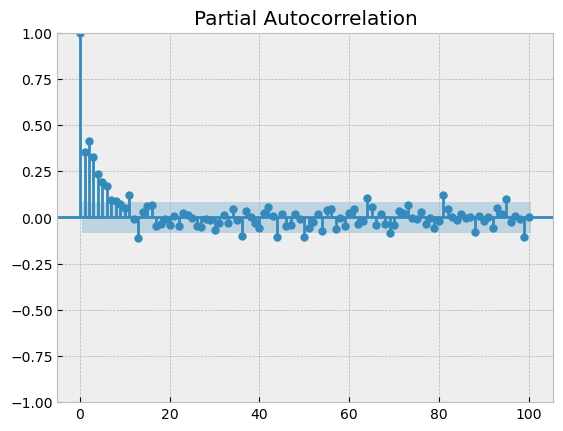

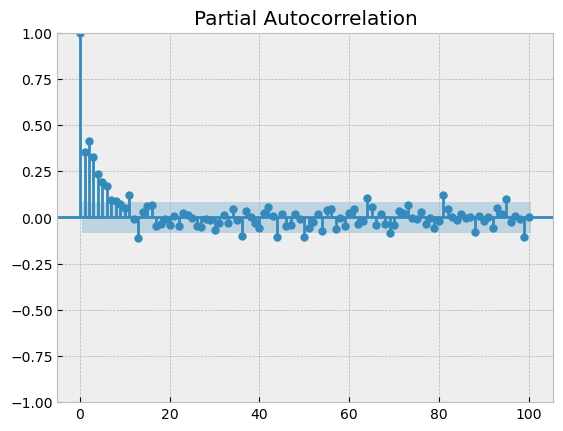

In [120]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(boiler["Pressure"], lags = 100)

In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 1. Now let’s build an ARIMA model:

The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

In [105]:
p, d, q = 5, 1, 1
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(boiler["Pressure"],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Pressure   No. Observations:                  545
Model:             SARIMAX(5, 1, 1)x(5, 1, 1, 12)   Log Likelihood                -295.863
Date:                            Thu, 06 Jul 2023   AIC                            617.726
Time:                                    17:19:30   BIC                            673.323
Sample:                                01-01-2018   HQIC                           639.484
                                     - 06-29-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3832      0.096     -4.010      0.000      -0.571      -0.196
ar.L2         -0.1621      0.101     -1.606      0.108      -0.360       0.036
ar.L3         -0.1028      0.083     -1.240      0.215      -0.265       0.060
ar.L4         -0.0877      0.072     -1.221      0.222      -0.228       0.053
ar.L5         -0.0548      0.060     -0.919      0.358      -0.172       0.062
ma.L1         -0.7337      0.082     -8.909      0.000      -0.895      -0.572
ar.S.L12      -0.0527      0.058     -0.904      0.366      -0.167       0.062
ar.S.L24       0.0082      0.053      0.154      0.878      -0.096       0.112
ar.S.L36      -0.0759      0.053     -1.429      0.153      -0.180       0.028
ar.S.L48       0.0846      0.049      1.732      0.083      -0.011       0.180
ar.S.L60       0.0060      0.052      0.114      0.909      -0.096       0.108
ma.S.L12      -0.9984      0.816     -1.223      0.221      -2.598       0.602
sigma2         0.1626      0.131      1.244      0.214      -0.094       0.419
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                63.69
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.68
Prob(H) (two-sided):                  0.55   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [130]:
predictions = model.predict(len(boiler), len(boiler)+120)
print(predictions)

2019-06-30    9.932434
2019-07-01    9.834675
2019-07-02    9.983547
2019-07-03    9.888408
2019-07-04    9.801377
                ...   
2019-10-24    9.763912
2019-10-25    9.861411
2019-10-26    9.814419
2019-10-27    9.945950
2019-10-28    9.853318
Freq: D, Name: predicted_mean, Length: 121, dtype: float64


<Axes: >

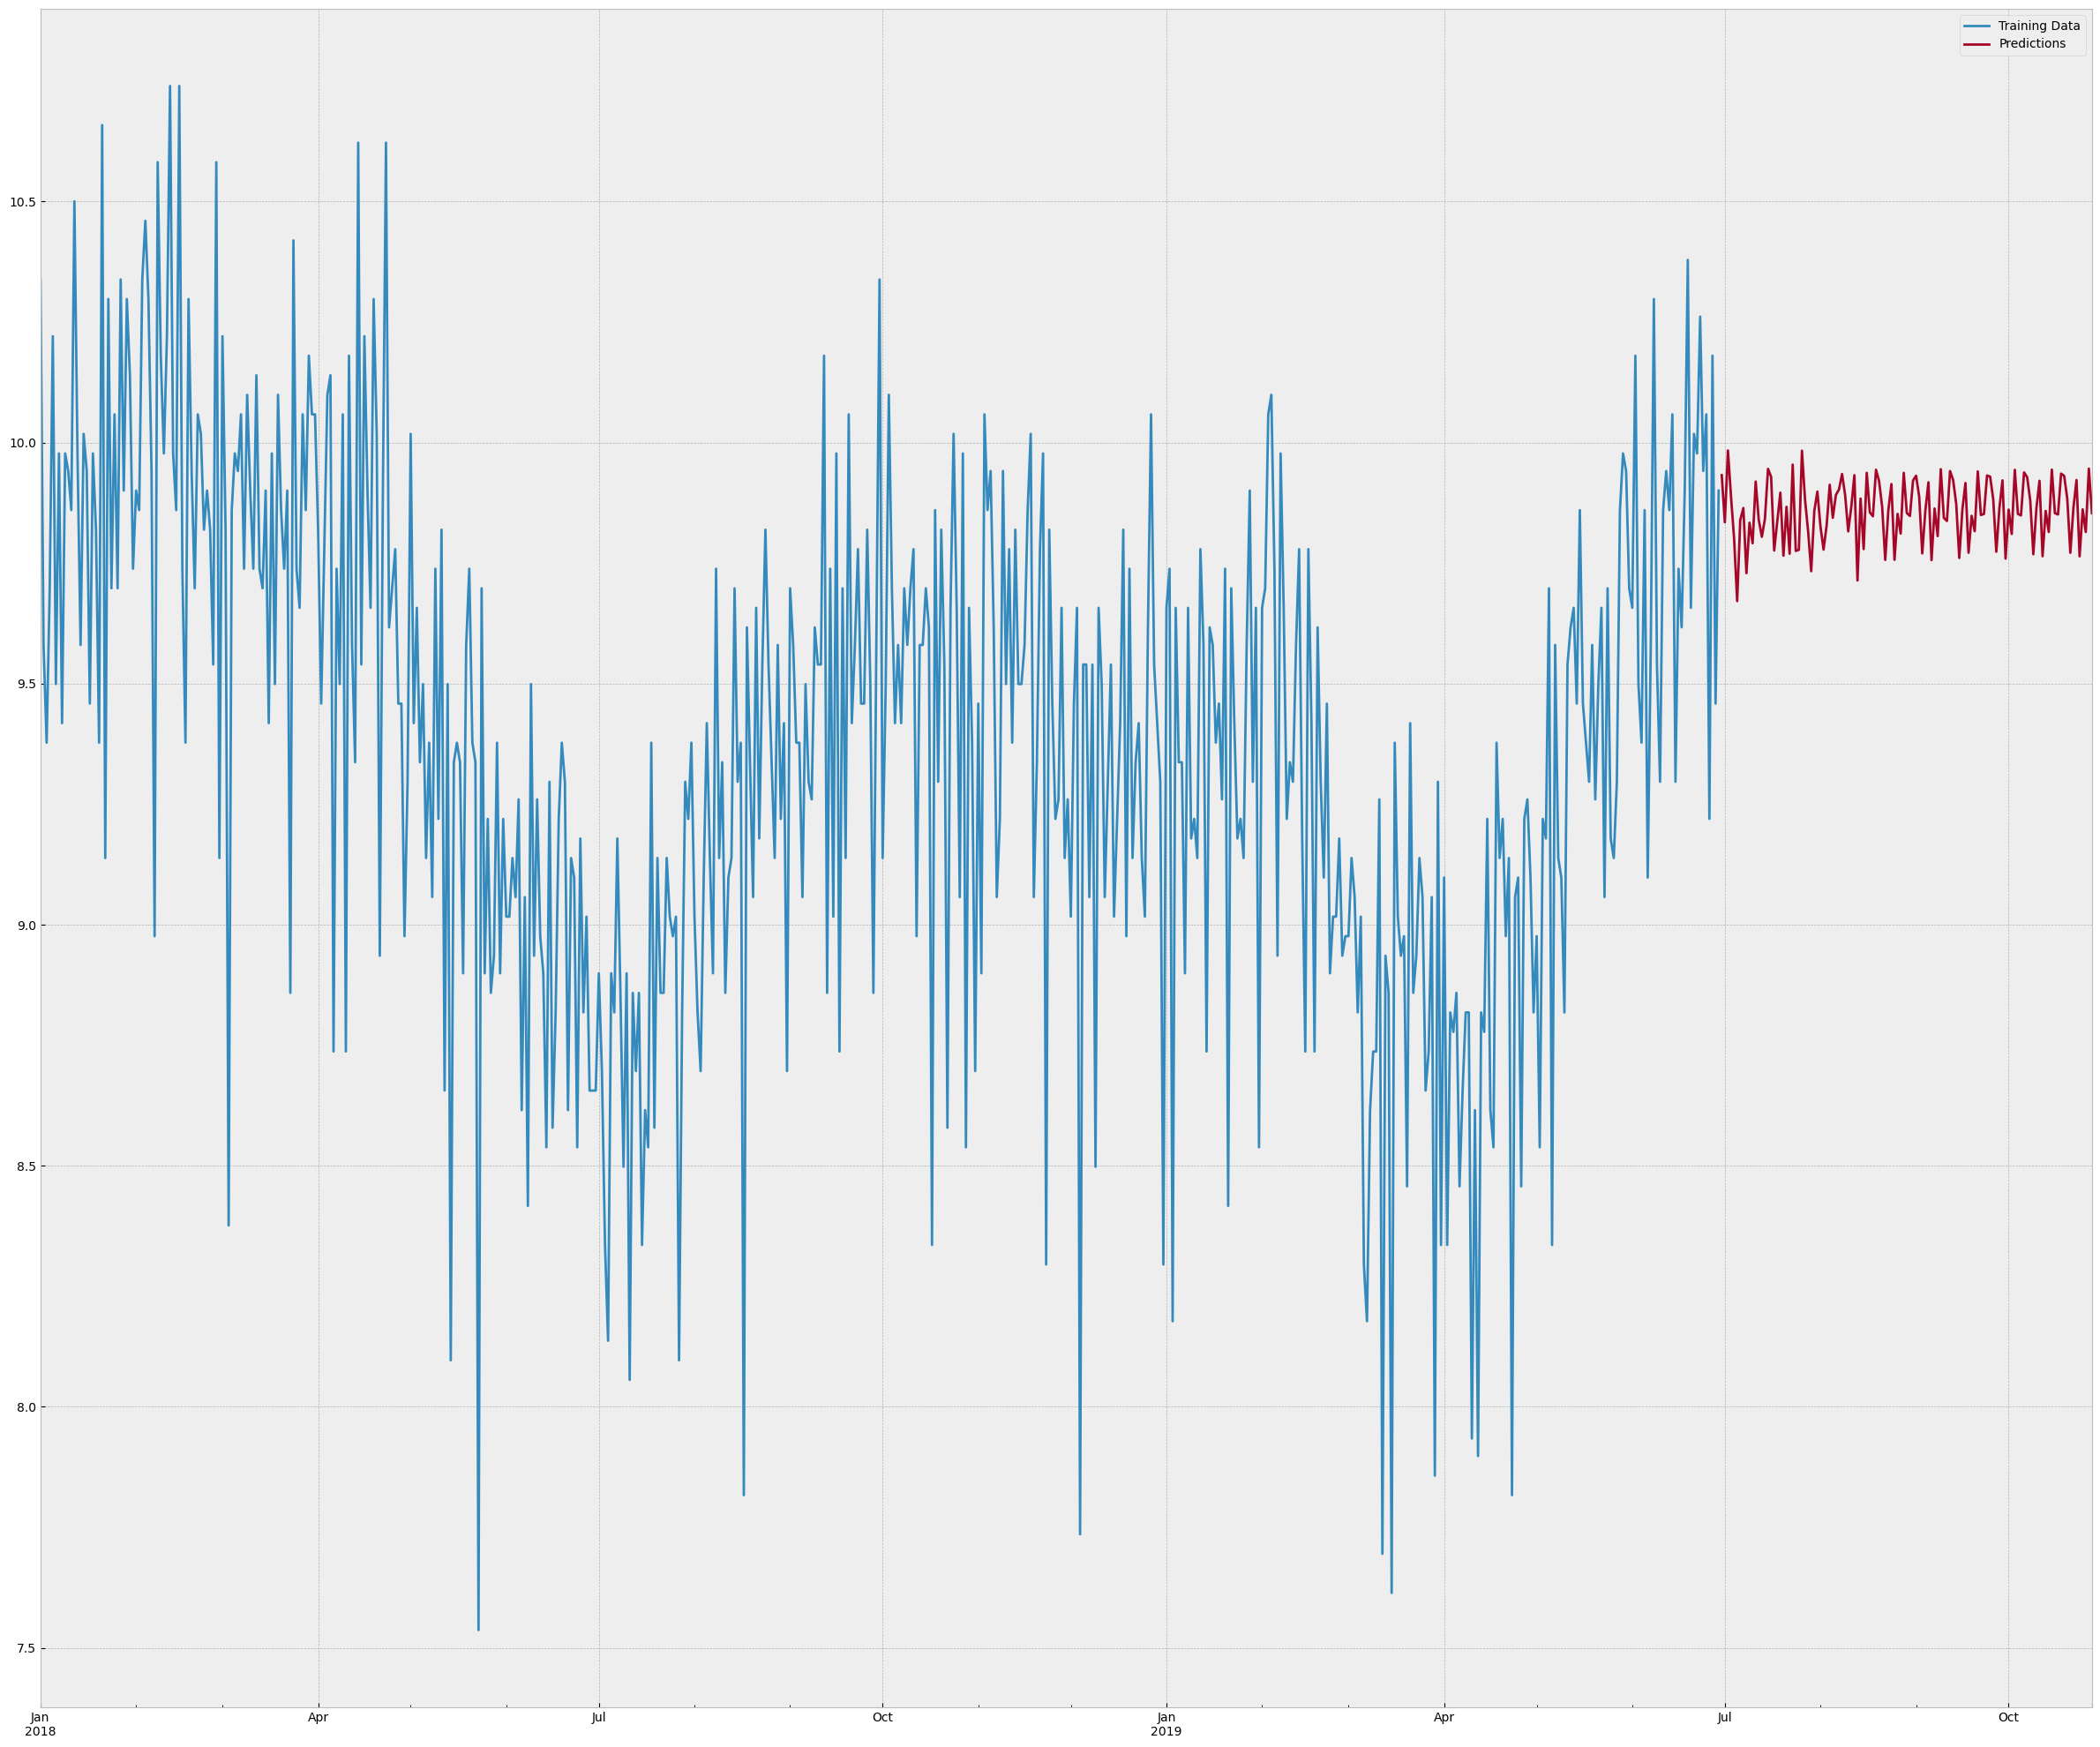

In [180]:
boiler["Pressure"].plot(legend=True, label="Training Data", figsize=(30, 25))
predictions.plot(legend=True, label="Predictions")

In [138]:
boil=boiler

In [139]:
boil.head()

Day Month  Year   Pressure
2018-01-01    1   Jan  2018  10.338284
2018-01-02    2   Jan  2018   9.580143
2018-01-03    3   Jan  2018   9.377435
2018-01-04    4   Jan  2018   9.697717
2018-01-05    5   Jan  2018  10.220714

In [173]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [175]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    model = SARIMAX(dataset, order=order)
                    model_fit = model.fit(disp=-1)
                    mse = np.mean((model_fit.resid) ** 2)
                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                        print('SARIMAX%s MSE=%.3f' % (order, mse))
                        
                except:
                    continue
                    
    print('Best SARIMAX%s MSE=%.3f' % (best_cfg, best_score))

In [179]:
# evaluate parameters
p_values = range(0, 10)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(boiler_ts.values, p_values, d_values, q_values)

SARIMAX(0, 0, 0) MSE=88.151
SARIMAX(0, 0, 1) MSE=25.390
SARIMAX(0, 0, 2) MSE=10.023
SARIMAX(0, 0, 3) MSE=5.342
SARIMAX(0, 0, 4) MSE=3.427
SARIMAX(0, 1, 0) MSE=0.578
SARIMAX(0, 1, 1) MSE=0.374
SARIMAX(0, 1, 2) MSE=0.363
SARIMAX(0, 1, 3) MSE=0.363
SARIMAX(0, 1, 4) MSE=0.363
SARIMAX(1, 0, 2) MSE=0.363
SARIMAX(1, 0, 4) MSE=0.363
SARIMAX(2, 0, 3) MSE=0.363
SARIMAX(2, 1, 2) MSE=0.363
SARIMAX(2, 1, 4) MSE=0.362
SARIMAX(3, 0, 4) MSE=0.361
SARIMAX(5, 0, 4) MSE=0.361
SARIMAX(5, 1, 4) MSE=0.361
SARIMAX(8, 0, 4) MSE=0.359
Best SARIMAX(8, 0, 4) MSE=0.359


In [181]:
p, d, q = 8, 0, 4
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(boiler["Pressure"],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Pressure   No. Observations:                  545
Model:             SARIMAX(8, 0, 4)x(8, 0, 4, 12)   Log Likelihood                -277.283
Date:                            Thu, 06 Jul 2023   AIC                            604.565
Time:                                    18:53:59   BIC                            712.085
Sample:                                01-01-2018   HQIC                           646.599
                                     - 06-29-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0114      0.131     -0.087      0.931      -0.269       0.246
ar.L2          0.0331      0.102      0.325      0.745      -0.166       0.232
ar.L3         -0.2833      0.099     -2.852      0.004      -0.478      -0.089
ar.L4          0.8315      0.078     10.669      0.000       0.679       0.984
ar.L5          0.2870      0.072      3.986      0.000       0.146       0.428
ar.L6          0.1084      0.071      1.517      0.129      -0.032       0.248
ar.L7          0.0423      0.064      0.662      0.508      -0.083       0.167
ar.L8         -0.0077      0.061     -0.126      0.900      -0.127       0.112
ma.L1         -0.1155      0.117     -0.988      0.323      -0.345       0.114
ma.L2          0.1400      0.099      1.408      0.159      -0.055       0.335
ma.L3          0.4197      0.124      3.374      0.001       0.176       0.664
ma.L4         -0.7686      0.085     -9.049      0.000      -0.935      -0.602
ar.S.L12       0.2916      1.225      0.238      0.812      -2.110       2.693
ar.S.L24      -0.1574      1.213     -0.130      0.897      -2.536       2.221
ar.S.L36      -0.1034      1.127     -0.092      0.927      -2.312       2.105
ar.S.L48      -0.2798      1.083     -0.258      0.796      -2.402       1.843
ar.S.L60      -0.0375      0.158     -0.237      0.813      -0.348       0.273
ar.S.L72       0.0458      0.158      0.290      0.772      -0.264       0.356
ar.S.L84      -0.0283      0.140     -0.202      0.840      -0.304       0.247
ar.S.L96       0.0750      0.110      0.680      0.497      -0.141       0.291
ma.S.L12      -0.3143      1.228     -0.256      0.798      -2.721       2.092
ma.S.L24       0.1652      1.232      0.134      0.893      -2.250       2.580
ma.S.L36       0.0467      1.141      0.041      0.967      -2.190       2.283
ma.S.L48       0.3947      1.072      0.368      0.713      -1.707       2.497
sigma2         0.1582      0.009     18.188      0.000       0.141       0.175
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                87.41
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.76
Prob(H) (two-sided):                  0.87   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
q=d=range(0,2) #year flcuation
p = range(0,6) # month flcuation

In [26]:
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1),
 (2, 0, 0),
 (2, 0, 1),
 (2, 1, 0),
 (2, 1, 1),
 (3, 0, 0),
 (3, 0, 1),
 (3, 1, 0),
 (3, 1, 1),
 (4, 0, 0),
 (4, 0, 1),
 (4, 1, 0),
 (4, 1, 1),
 (5, 0, 0),
 (5, 0, 1),
 (5, 1, 0),
 (5, 1, 1)]

In [27]:
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (3, 0, 0, 12),
 (3, 0, 1, 12),
 (3, 1, 0, 12),
 (3, 1, 1, 12),
 (4, 0, 0, 12),
 (4, 0, 1, 12),
 (4, 1, 0, 12),
 (4, 1, 1, 12),
 (5, 0, 0, 12),
 (5, 0, 1, 12),
 (5, 1, 0, 12),
 (5, 1, 1, 12)]

In [28]:
warnings.filterwarnings("ignore")
AIC=[]
SARIMAX_model=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(boiler_ts, order=param,seasonal_order=param_seasonal,
                                           enforce_stationarity=False, enforce_invertibility=False)
            results=mod.fit()
            print('SARIMAX:{} x {} - AIC : {}'.format(param,param_seasonal,results.aic), end = '\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:  
            continue

In [29]:
print('The smallest AIC is {} for model SARIMAX {} x {}'.format(min(AIC),
                                                            SARIMAX_model[AIC.index(min(AIC))][0],
                                                            SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 509.2914667013108 for model SARIMAX (3, 1, 1) x (5, 0, 0, 12)


In [30]:
mod_final = sm.tsa.statespace.SARIMAX(boiler_ts,order=SARIMAX_model[AIC.index(min(AIC))][0],
                                     seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                     enforce_stationarity=False,
                                     enforce_invertibility=False)

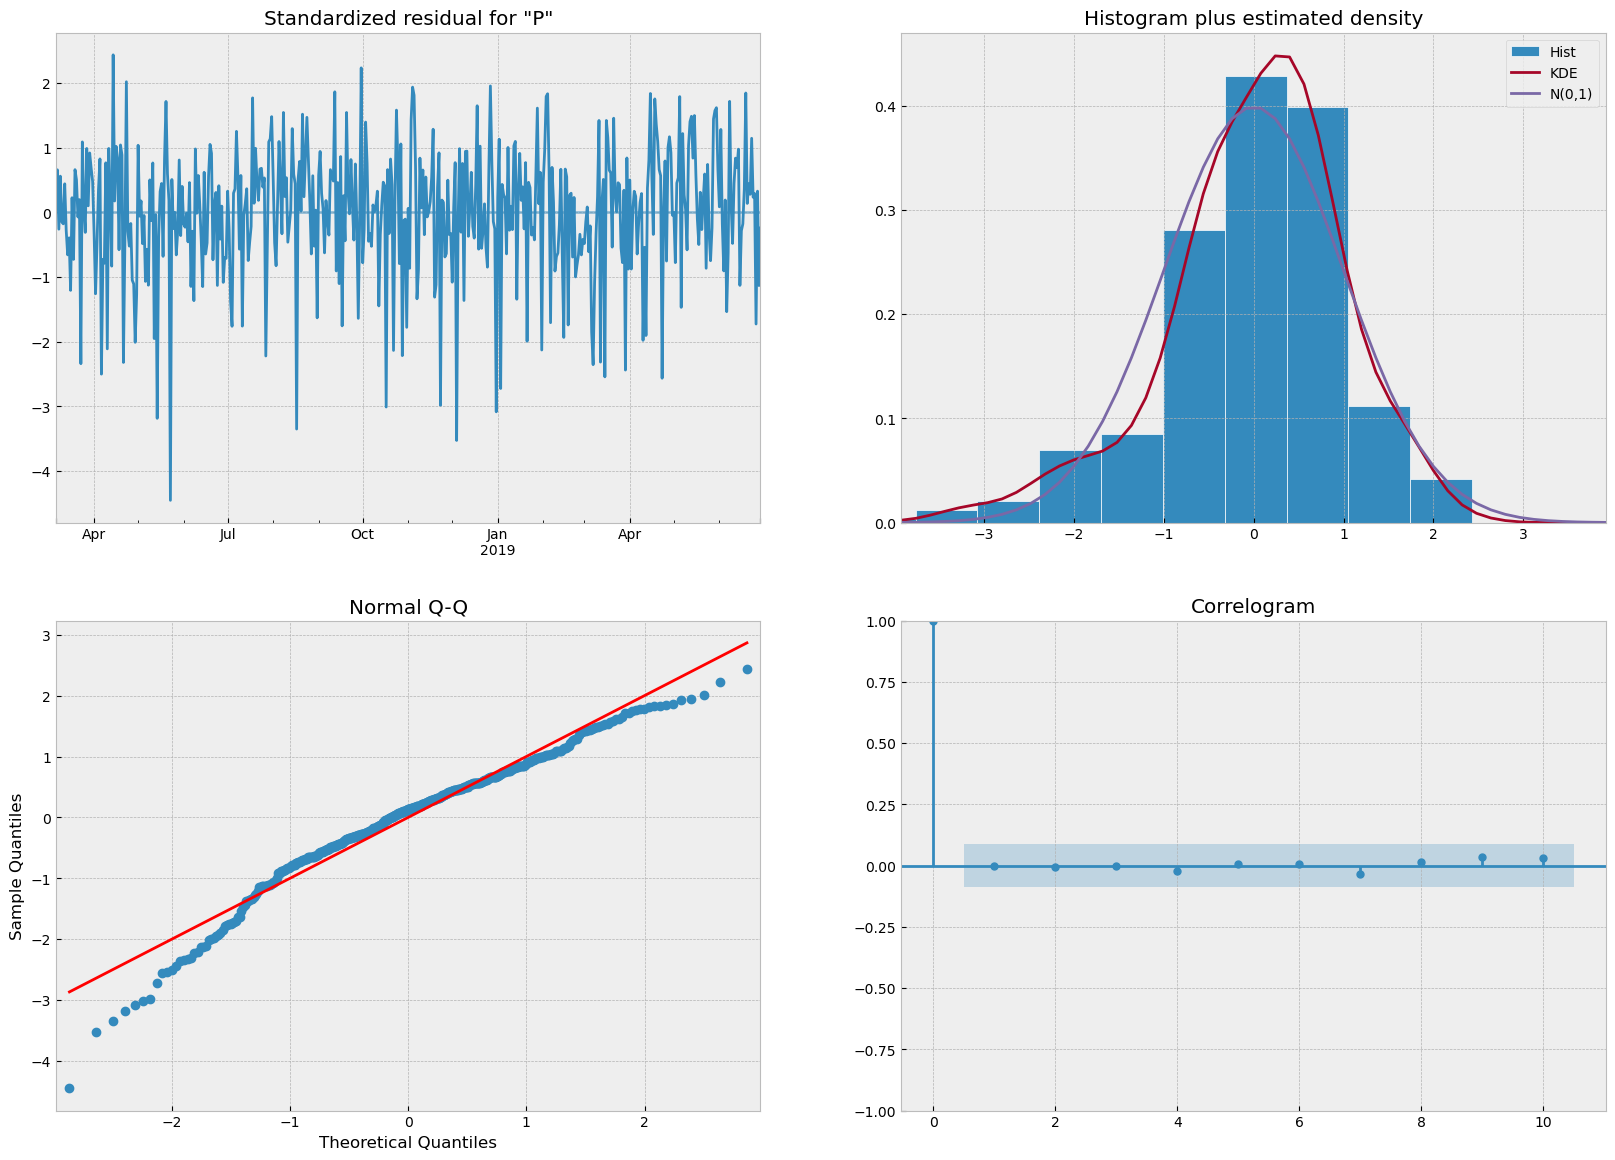

In [31]:
results=mod_final.fit()
results.plot_diagnostics(figsize=(20,14))
plt.show()

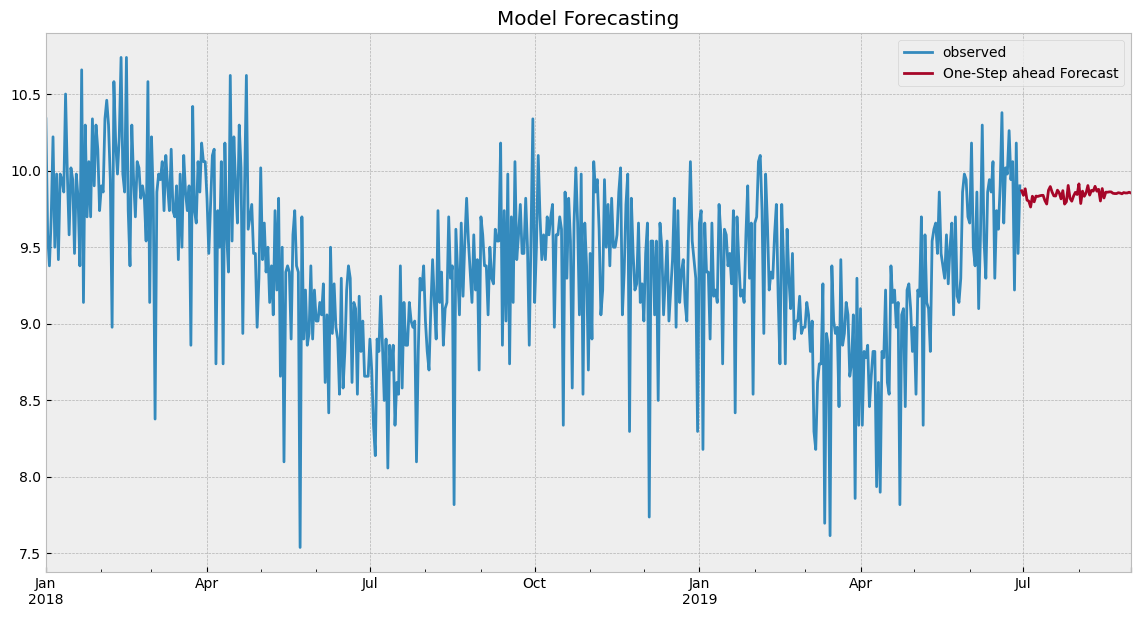

In [33]:
pred4 = results.get_prediction(start=pd.to_datetime('2019-06-30'),end = pd.to_datetime('2019-08-30'),dynamic = True)
ax=boiler_ts.plot(label='observed')
pred4.predicted_mean.plot(ax=ax,label='One-Step ahead Forecast',lw=2,alpha=1,figsize=(14,7))
plt.title('Model Forecasting')
plt.legend(loc='best')